In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
import numpy as np

# Load the data
info_A1 = pd.read_csv(r"C:\Users\pingk\Downloads\fadhli nitip\asik_rt4_now with indo new.csv")

In [2]:
df = info_A1

# Function to remove outliers
def remove_outliers(df):
    # Select numeric columns
    numeric_cols = df.select_dtypes(include=['number']).columns
    df_numeric = df[numeric_cols]
    
    iso = IsolationForest(contamination=0.05)
    yhat = iso.fit_predict(df_numeric)
    mask = yhat != -1
    df_cleaned = df[mask].reset_index(drop=True)
    return df_cleaned

df = remove_outliers(df)

# Standardize the numeric data
numeric_cols = df.select_dtypes(include=['number']).columns
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Identify numeric and string columns
string_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

# Check the first few rows of the prepared data
print(df.head())

  prov_char country_char               wavenumber   649.893   650.376  \
0       BBX           ID  ID-BBX-068-2307-031_001  0.474946  0.709298   
1       BBX           ID  ID-BBX-068-2307-031_002 -0.232782 -0.418680   
2       BBX           ID  ID-BBX-068-2307-031_003  0.434295  0.471411   
3       BBX           ID  ID-BBX-068-2307-031_004 -0.352086 -0.548913   
4       BBX           ID  ID-BBX-068-2307-031_005 -0.133848 -0.329424   

    650.858    651.34   651.822   652.304   652.786  ...  3998.194  3998.676  \
0  0.874685  0.932287  0.847512  0.609881  0.243638  ... -0.030075 -0.032203   
1 -0.574266 -0.688752 -0.754719 -0.768907 -0.736397  ...  0.097665  0.080984   
2  0.433502  0.303054  0.077563 -0.220760 -0.552175  ... -0.119773 -0.204150   
3 -0.826510 -1.140626 -1.435371 -1.661655 -1.801515  ...  0.479475  0.462116   
4 -0.507660 -0.668735 -0.819976 -0.968412 -1.114893  ...  0.634469  0.616562   

   3999.158   3999.64  4000.122  tgp_name  dgp_name  fgp_name  country_name  \
0

In [3]:
numeric_cols

Index(['649.893', '650.376', '650.858', '651.34', '651.822', '652.304',
       '652.786', '653.268', '653.75', '654.232',
       ...
       '3995.783', '3996.265', '3996.747', '3997.23', '3997.712', '3998.194',
       '3998.676', '3999.158', '3999.64', '4000.122'],
      dtype='object', length=6950)

In [4]:
string_cols

['prov_char',
 'country_char',
 'wavenumber',
 'tgp_name',
 'dgp_name',
 'fgp_name',
 'country_name',
 'thnoth_name']

In [5]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
df['thnoth_name_encoded'] = label_encoder.fit_transform(df['thnoth_name'])

# Check the encoded target variable
print(df[['thnoth_name', 'thnoth_name_encoded']])

    thnoth_name  thnoth_name_encoded
0      Non-Thai                    0
1      Non-Thai                    0
2      Non-Thai                    0
3      Non-Thai                    0
4      Non-Thai                    0
..          ...                  ...
472    Non-Thai                    0
473    Non-Thai                    0
474    Non-Thai                    0
475    Non-Thai                    0
476    Non-Thai                    0

[477 rows x 2 columns]


C:\Users\pingk\AppData\Local\Temp\ipykernel_40832\51326866.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['thnoth_name_encoded'] = label_encoder.fit_transform(df['thnoth_name'])


In [6]:
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier

# Define the model
model = RandomForestClassifier(random_state=42)

# Define the LOOCV procedure
loo = LeaveOneOut()

# Prepare the features and target variable
X = df.drop(columns=['country_name', 'thnoth_name_encoded', 'prov_char', 'country_char', 'wavenumber', 'thnoth_name', 'tgp_name', 'dgp_name', 'fgp_name'])
y = df['thnoth_name_encoded']

# Check the first few rows of the features and target variable
print(X.head())
print(y.head())


    649.893   650.376   650.858    651.34   651.822   652.304   652.786  \
0  0.474946  0.709298  0.874685  0.932287  0.847512  0.609881  0.243638   
1 -0.232782 -0.418680 -0.574266 -0.688752 -0.754719 -0.768907 -0.736397   
2  0.434295  0.471411  0.433502  0.303054  0.077563 -0.220760 -0.552175   
3 -0.352086 -0.548913 -0.826510 -1.140626 -1.435371 -1.661655 -1.801515   
4 -0.133848 -0.329424 -0.507660 -0.668735 -0.819976 -0.968412 -1.114893   

    653.268    653.75   654.232  ...  3995.783  3996.265  3996.747   3997.23  \
0 -0.197614 -0.647018 -1.039575  ... -0.219427 -0.154956 -0.101127 -0.062267   
1 -0.672439 -0.602313 -0.558048  ... -0.012475  0.043293  0.084568  0.106226   
2 -0.870147 -1.132543 -1.304557  ... -0.097753 -0.040761 -0.010011 -0.013189   
3 -1.869846 -1.898682 -1.912489  ...  0.379355  0.417986  0.450204  0.472304   
4 -1.249647 -1.350375 -1.387805  ...  0.644584  0.655917  0.658182  0.654478   

   3997.712  3998.194  3998.676  3999.158   3999.64  4000.122  
0 -0

In [7]:
# Specific samples to leave out based on 'prov_char'
leave_out_provs = ['SKM', 'PLG', 'JHR', 'SSX', 'PNA', 'KTX']

# Store predictions and actual values
predictions = []
actuals = []

# Apply LOOCV
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Check if the test sample should be left out
    if df.iloc[test_index]['prov_char'].values[0] in leave_out_provs:
        continue
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict the test sample
    y_pred = model.predict(X_test)
    
    # Store the prediction and actual value
    predictions.append(y_pred[0])
    actuals.append(y_test.values[0])

# Check the first few predictions and actual values
print(predictions[:5])
print(actuals[:5])


[np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0)]
[np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0)]


In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the model
accuracy = accuracy_score(actuals, predictions)
precision = precision_score(actuals, predictions, average='macro')
recall = recall_score(actuals, predictions, average='macro')
f1 = f1_score(actuals, predictions, average='macro')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 0.9400479616306955
Precision: 0.9326670782528168
Recall: 0.8841120855028775
F1 Score: 0.9055578203560266


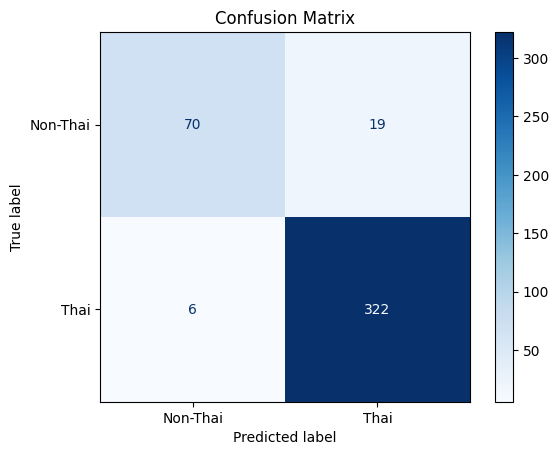

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(actuals, predictions)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [10]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to evaluate a model on both training and test sets
def evaluate_train_test(model, X_train, y_train, X_test, y_test):
    # Fit the model on the training set
    model.fit(X_train, y_train)
    
    # Predict on the training set
    y_train_pred = model.predict(X_train)
    
    # Predict on the test set
    y_test_pred = model.predict(X_test)
    
    # Compute metrics for the training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, average='macro')
    train_recall = recall_score(y_train, y_train_pred, average='macro')
    train_f1 = f1_score(y_train, y_train_pred, average='macro')
    
    # Compute metrics for the test set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='macro')
    test_recall = recall_score(y_test, y_test_pred, average='macro')
    test_f1 = f1_score(y_test, y_test_pred, average='macro')
    
    return {
        'Train': {'Accuracy': train_accuracy, 'Precision': train_precision, 'Recall': train_recall, 'F1 Score': train_f1},
        'Test': {'Accuracy': test_accuracy, 'Precision': test_precision, 'Recall': test_recall, 'F1 Score': test_f1}
    }

# Evaluate the RandomForest model on both training and test sets
rf_results = evaluate_train_test(model, X_train, y_train, X_test, y_test)

# Display the results
print("RandomForest Model Evaluation")
for dataset in ['Train', 'Test']:
    print(f"{dataset} Set:")
    for metric, score in rf_results[dataset].items():
        print(f"{metric}: {score}")
    print()


RandomForest Model Evaluation
Train Set:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Test Set:
Accuracy: 0.8680555555555556
Precision: 0.9151785714285714
Recall: 0.8137254901960784
F1 Score: 0.8392007052600647



Train-Test 80:20, RF

In [11]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate a model on both training and test sets
def evaluate_train_test(model, X_train, y_train, X_test, y_test):
    # Fit the model on the training set
    model.fit(X_train, y_train)
    
    # Predict on the training set
    y_train_pred = model.predict(X_train)
    
    # Predict on the test set
    y_test_pred = model.predict(X_test)
    
    # Compute metrics for the training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, average='macro')
    train_recall = recall_score(y_train, y_train_pred, average='macro')
    train_f1 = f1_score(y_train, y_train_pred, average='macro')
    
    # Compute metrics for the test set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='macro')
    test_recall = recall_score(y_test, y_test_pred, average='macro')
    test_f1 = f1_score(y_test, y_test_pred, average='macro')
    
    return {
        'Train': {'Accuracy': train_accuracy, 'Precision': train_precision, 'Recall': train_recall, 'F1 Score': train_f1},
        'Test': {'Accuracy': test_accuracy, 'Precision': test_precision, 'Recall': test_recall, 'F1 Score': test_f1}
    }

# Evaluate the RandomForest model on both training and test sets
rf_results = evaluate_train_test(model, X_train, y_train, X_test, y_test)

# Display the results
print("RandomForest Model Evaluation")
for dataset in ['Train', 'Test']:
    print(f"{dataset} Set:")
    for metric, score in rf_results[dataset].items():
        print(f"{metric}: {score}")
    print()


RandomForest Model Evaluation
Train Set:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Test Set:
Accuracy: 0.8854166666666666
Precision: 0.9266666666666667
Recall: 0.828125
F1 Score: 0.8566580697705987



In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix: {title}')
    plt.show()


Train-Test 80:20, RF, GB, SVC, k-NN

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

# List of models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'k-NN': KNeighborsClassifier()
}

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate a model on both training and test sets
def evaluate_train_test(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_metrics = {
        'Accuracy': accuracy_score(y_train, y_train_pred),
        'Precision': precision_score(y_train, y_train_pred, average='macro'),
        'Recall': recall_score(y_train, y_train_pred, average='macro'),
        'F1 Score': f1_score(y_train, y_train_pred, average='macro')
    }
    
    test_metrics = {
        'Accuracy': accuracy_score(y_test, y_test_pred),
        'Precision': precision_score(y_test, y_test_pred, average='macro'),
        'Recall': recall_score(y_test, y_test_pred, average='macro'),
        'F1 Score': f1_score(y_test, y_test_pred, average='macro')
    }
    
    return train_metrics, test_metrics

# Evaluate each model on both training and test sets
train_test_results = {}
for name, model in models.items():
    print(f"Evaluating train vs test for {name}...")
    train_metrics, test_metrics = evaluate_train_test(model, X_train, y_train, X_test, y_test)
    train_test_results[name] = {'Train': train_metrics, 'Test': test_metrics}

# Display the train vs test results
for model_name, metrics in train_test_results.items():
    print(f"Model: {model_name}")
    for dataset, dataset_metrics in metrics.items():
        print(f"{dataset} Set:")
        for metric_name, score in dataset_metrics.items():
            print(f"{metric_name}: {score}")
        print()


Evaluating train vs test for Random Forest...
Evaluating train vs test for Gradient Boosting...
Evaluating train vs test for SVM...
Evaluating train vs test for k-NN...
Model: Random Forest
Train Set:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Test Set:
Accuracy: 0.8854166666666666
Precision: 0.9266666666666667
Recall: 0.828125
F1 Score: 0.8566580697705987

Model: Gradient Boosting
Train Set:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Test Set:
Accuracy: 0.9375
Precision: 0.9453781512605042
Recall: 0.9140625
F1 Score: 0.9272727272727272

Model: SVM
Train Set:
Accuracy: 0.952755905511811
Precision: 0.965153452685422
Recall: 0.9194647944647945
F1 Score: 0.9389857651245552

Test Set:
Accuracy: 0.8958333333333334
Precision: 0.9166666666666667
Recall: 0.8515625
F1 Score: 0.8739495798319328

Model: k-NN
Train Set:
Accuracy: 0.968503937007874
Precision: 0.9722064056939501
Recall: 0.9500407000407001
F1 Score: 0.9603235212440988

Test Set:
Accuracy: 0.9270833333333334


K-Fold 10, RF

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import classification_report

# Define the model
model = RandomForestClassifier(random_state=42)

# Define the cross-validation procedure
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Prepare the features and target variable
X = df.drop(columns=['country_name', 'thnoth_name_encoded', 'prov_char', 'country_char', 'wavenumber', 'thnoth_name', 'tgp_name', 'dgp_name', 'fgp_name'])
y = df['thnoth_name_encoded']

# Cross-validation predictions
y_pred = cross_val_predict(model, X, y, cv=kf)

# Generate the classification report
report = classification_report(y, y_pred, target_names=label_encoder.classes_)
print(report)


              precision    recall  f1-score   support

    Non-Thai       0.94      0.78      0.85       140
        Thai       0.91      0.98      0.95       337

    accuracy                           0.92       477
   macro avg       0.93      0.88      0.90       477
weighted avg       0.92      0.92      0.92       477



K-Fold 10, GBC

Gradient Boosting Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.93      0.76      0.84       140
        Thai       0.91      0.98      0.94       337

    accuracy                           0.91       477
   macro avg       0.92      0.87      0.89       477
weighted avg       0.92      0.91      0.91       477



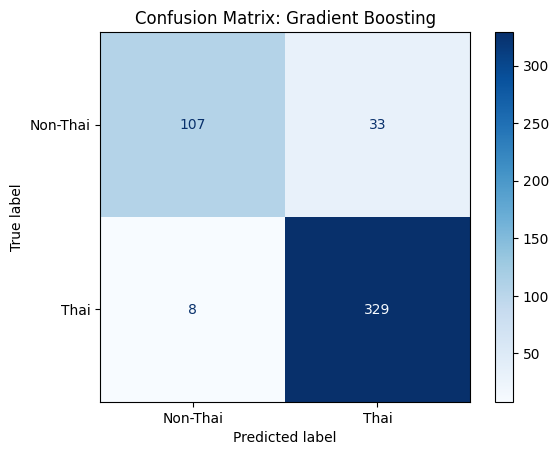

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define the Gradient Boosting model
gbc = GradientBoostingClassifier(random_state=42)

# Define the cross-validation procedure
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Prepare the features and target variable (assuming X and y are already prepared)
# Cross-validation predictions
y_pred_gbc = cross_val_predict(gbc, X, y, cv=kf)

# Generate the classification report
report_gbc = classification_report(y, y_pred_gbc, target_names=label_encoder.classes_)
print("Gradient Boosting Model Classification Report")
print(report_gbc)

# Plot the confusion matrix
cm_gbc = confusion_matrix(y, y_pred_gbc)
disp_gbc = ConfusionMatrixDisplay(confusion_matrix=cm_gbc, display_labels=label_encoder.classes_)
disp_gbc.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Gradient Boosting')
plt.show()


In [16]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y, y_pred_gbc)
print(f"Gradient Boosting Model Test Accuracy: {accuracy}")


Gradient Boosting Model Test Accuracy: 0.9140461215932913


In [17]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np

# Define the Gradient Boosting model
gbc = GradientBoostingClassifier(random_state=42)

# Define the cross-validation procedure
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Prepare the features and target variable (assuming X and y are already prepared)
train_accuracies = []
test_accuracies = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    gbc.fit(X_train, y_train)
    
    y_train_pred = gbc.predict(X_train)
    y_test_pred = gbc.predict(X_test)
    
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))

# Calculate the average train and test accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'Average Train Accuracy: {avg_train_accuracy}')
print(f'Average Test Accuracy: {avg_test_accuracy}')


Average Train Accuracy: 1.0
Average Test Accuracy: 0.9139627659574469


KFold 5, RF

5-Fold CV Average Train Accuracy: 1.0
5-Fold CV Average Test Accuracy: 0.9077631578947368
5-Fold CV Random Forest Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.94      0.74      0.82       140
        Thai       0.90      0.98      0.94       337

    accuracy                           0.91       477
   macro avg       0.92      0.86      0.88       477
weighted avg       0.91      0.91      0.90       477



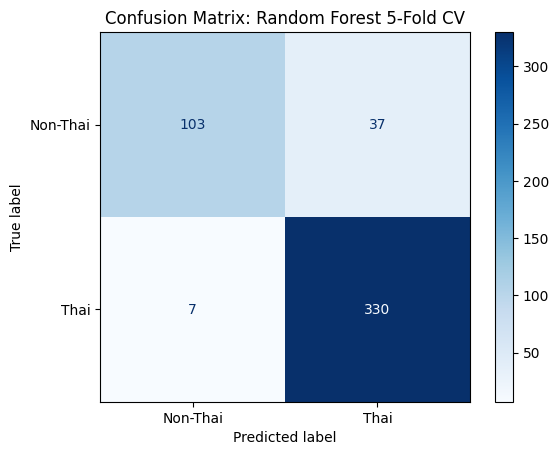

Class: Non-Thai
precision: 0.9363636363636364
recall: 0.7357142857142858
f1-score: 0.824
support: 140.0

Class: Thai
precision: 0.8991825613079019
recall: 0.9792284866468842
f1-score: 0.9375
support: 337.0

accuracy: 0.9077568134171907

Class: macro avg
precision: 0.9177730988357691
recall: 0.8574713861805849
f1-score: 0.8807499999999999
support: 477.0

Class: weighted avg
precision: 0.9100952458106332
recall: 0.9077568134171907
f1-score: 0.9041876310272537
support: 477.0



In [18]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define the Random Forest model
model_rf = RandomForestClassifier(random_state=42)

# Define the 5-fold cross-validation procedure
kf_5 = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 5-fold cross-validation
for train_index, test_index in kf_5.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model
    model_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = model_rf.predict(X_train)
    y_test_pred = model_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value for the test set
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'5-Fold CV Average Train Accuracy: {avg_train_accuracy}')
print(f'5-Fold CV Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_kf5 = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("5-Fold CV Random Forest Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_rf_kf5 = confusion_matrix(y_true_all, y_pred_all)
disp_rf_kf5 = ConfusionMatrixDisplay(confusion_matrix=cm_rf_kf5, display_labels=label_encoder.classes_)
disp_rf_kf5.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Random Forest 5-Fold CV')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_kf5.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


K-Fold 5, RF

5-Fold CV Average Train Accuracy: 1.0
5-Fold CV Average Test Accuracy: 0.9077631578947368
5-Fold CV Random Forest Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.94      0.74      0.82       140
        Thai       0.90      0.98      0.94       337

    accuracy                           0.91       477
   macro avg       0.92      0.86      0.88       477
weighted avg       0.91      0.91      0.90       477



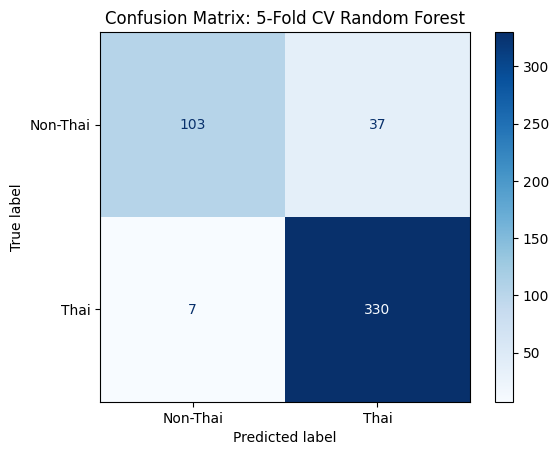

Class: Non-Thai
precision: 0.9363636363636364
recall: 0.7357142857142858
f1-score: 0.824
support: 140.0

Class: Thai
precision: 0.8991825613079019
recall: 0.9792284866468842
f1-score: 0.9375
support: 337.0

accuracy: 0.9077568134171907

Class: macro avg
precision: 0.9177730988357691
recall: 0.8574713861805849
f1-score: 0.8807499999999999
support: 477.0

Class: weighted avg
precision: 0.9100952458106332
recall: 0.9077568134171907
f1-score: 0.9041876310272537
support: 477.0



In [19]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define the 5-fold cross-validation procedure
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 5-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model
    model_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = model_rf.predict(X_train)
    y_test_pred = model_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'5-Fold CV Average Train Accuracy: {avg_train_accuracy}')
print(f'5-Fold CV Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_kf5 = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("5-Fold CV Random Forest Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_kf5 = confusion_matrix(y_true_all, y_pred_all)
disp_kf5 = ConfusionMatrixDisplay(confusion_matrix=cm_kf5, display_labels=label_encoder.classes_)
disp_kf5.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 5-Fold CV Random Forest')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_kf5.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


K-Fold 10, RF

10-Fold CV Average Train Accuracy: 1.0
10-Fold CV Average Test Accuracy: 0.9202570921985815
10-Fold CV Random Forest Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.94      0.78      0.85       140
        Thai       0.91      0.98      0.95       337

    accuracy                           0.92       477
   macro avg       0.93      0.88      0.90       477
weighted avg       0.92      0.92      0.92       477



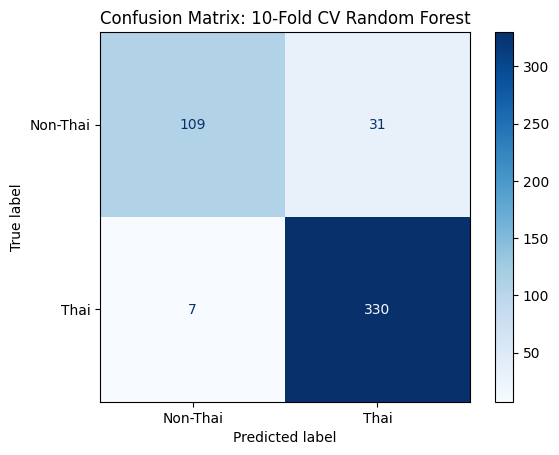

Class: Non-Thai
precision: 0.9396551724137931
recall: 0.7785714285714286
f1-score: 0.8515625
support: 140.0

Class: Thai
precision: 0.9141274238227147
recall: 0.9792284866468842
f1-score: 0.9455587392550143
support: 337.0

accuracy: 0.9203354297693921

Class: macro avg
precision: 0.926891298118254
recall: 0.8788999576091564
f1-score: 0.8985606196275071
support: 477.0

Class: weighted avg
precision: 0.9216198447928425
recall: 0.9203354297693921
f1-score: 0.917970744505115
support: 477.0



In [20]:
# Define the 10-fold cross-validation procedure
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model
    model_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = model_rf.predict(X_train)
    y_test_pred = model_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_kf10 = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Random Forest Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_kf10 = confusion_matrix(y_true_all, y_pred_all)
disp_kf10 = ConfusionMatrixDisplay(confusion_matrix=cm_kf10, display_labels=label_encoder.classes_)
disp_kf10.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Random Forest')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_kf10.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


K-Fold 40, RF

40-Fold CV Average Train Accuracy: 1.0
40-Fold CV Average Test Accuracy: 0.9325757575757574
40-Fold CV Random Forest Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.95      0.81      0.88       140
        Thai       0.93      0.98      0.95       337

    accuracy                           0.93       477
   macro avg       0.94      0.90      0.92       477
weighted avg       0.93      0.93      0.93       477



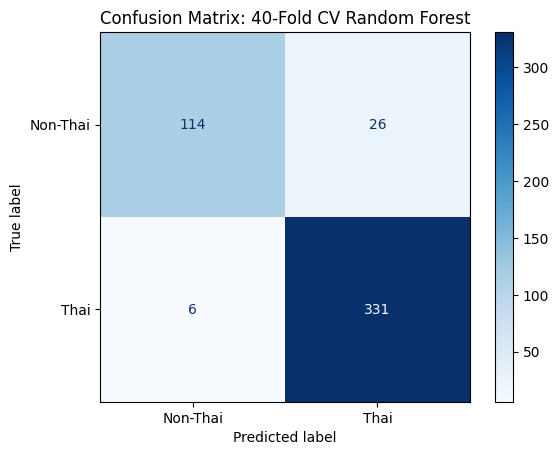

Class: Non-Thai
precision: 0.95
recall: 0.8142857142857143
f1-score: 0.8769230769230769
support: 140.0

Class: Thai
precision: 0.927170868347339
recall: 0.9821958456973294
f1-score: 0.9538904899135446
support: 337.0

accuracy: 0.9329140461215933

Class: macro avg
precision: 0.9385854341736695
recall: 0.8982407799915219
f1-score: 0.9154067834183108
support: 477.0

Class: weighted avg
precision: 0.9338712424173023
recall: 0.9329140461215933
f1-score: 0.9313004735222125
support: 477.0



In [21]:
# Define the 40-fold cross-validation procedure
kf = KFold(n_splits=40, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 40-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model
    model_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = model_rf.predict(X_train)
    y_test_pred = model_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'40-Fold CV Average Train Accuracy: {avg_train_accuracy}')
print(f'40-Fold CV Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_kf40 = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("40-Fold CV Random Forest Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_kf40 = confusion_matrix(y_true_all, y_pred_all)
disp_kf40 = ConfusionMatrixDisplay(confusion_matrix=cm_kf40, display_labels=label_encoder.classes_)
disp_kf40.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 40-Fold CV Random Forest')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_kf40.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Variance Threshold

10-Fold CV with Variance Threshold - Average Train Accuracy: 1.0
10-Fold CV with Variance Threshold - Average Test Accuracy: 0.9202570921985815
10-Fold CV Random Forest Model with Variance Threshold Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.94      0.78      0.85       140
        Thai       0.91      0.98      0.95       337

    accuracy                           0.92       477
   macro avg       0.93      0.88      0.90       477
weighted avg       0.92      0.92      0.92       477



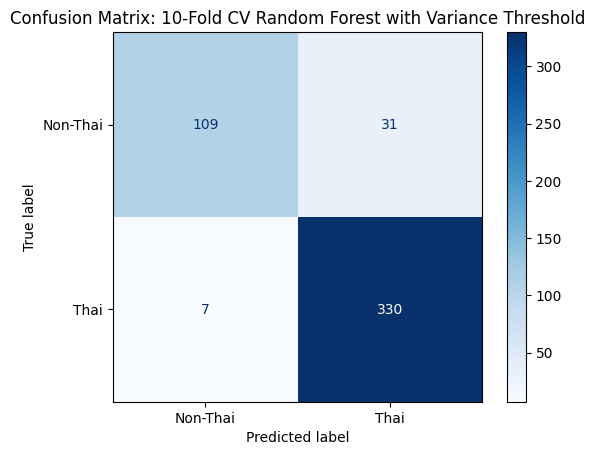

Class: Non-Thai
precision: 0.9396551724137931
recall: 0.7785714285714286
f1-score: 0.8515625
support: 140.0

Class: Thai
precision: 0.9141274238227147
recall: 0.9792284866468842
f1-score: 0.9455587392550143
support: 337.0

accuracy: 0.9203354297693921

Class: macro avg
precision: 0.926891298118254
recall: 0.8788999576091564
f1-score: 0.8985606196275071
support: 477.0

Class: weighted avg
precision: 0.9216198447928425
recall: 0.9203354297693921
f1-score: 0.917970744505115
support: 477.0



In [22]:
from sklearn.feature_selection import VarianceThreshold

# Define the Random Forest model
model_rf = RandomForestClassifier(random_state=42)

# Variance Threshold
selector = VarianceThreshold(threshold=0.01)
X_var = selector.fit_transform(X)

# Define the 10-fold cross-validation procedure
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_var):
    X_train, X_test = X_var[train_index], X_var[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    model_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = model_rf.predict(X_train)
    y_test_pred = model_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Variance Threshold - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Variance Threshold - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_var = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Random Forest Model with Variance Threshold Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_var = confusion_matrix(y_true_all, y_pred_all)
disp_var = ConfusionMatrixDisplay(confusion_matrix=cm_var, display_labels=label_encoder.classes_)
disp_var.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Random Forest with Variance Threshold')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_var.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Recursive Feature Elimination (RFE)

10-Fold CV with RFE - Average Train Accuracy: 1.0
10-Fold CV with RFE - Average Test Accuracy: 0.9579343971631203
10-Fold CV Random Forest Model with RFE Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.95      0.90      0.93       140
        Thai       0.96      0.98      0.97       337

    accuracy                           0.96       477
   macro avg       0.96      0.94      0.95       477
weighted avg       0.96      0.96      0.96       477



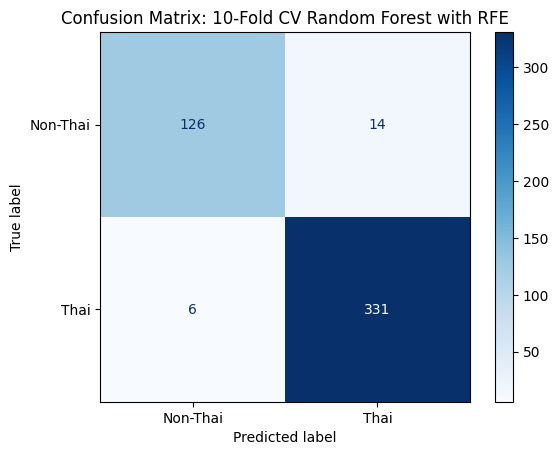

Class: Non-Thai
precision: 0.9545454545454546
recall: 0.9
f1-score: 0.9264705882352942
support: 140.0

Class: Thai
precision: 0.9594202898550724
recall: 0.9821958456973294
f1-score: 0.9706744868035191
support: 337.0

accuracy: 0.9580712788259959

Class: macro avg
precision: 0.9569828722002636
recall: 0.9410979228486647
f1-score: 0.9485725375194066
support: 477.0

Class: weighted avg
precision: 0.9579895205818093
recall: 0.9580712788259959
f1-score: 0.9577005962384217
support: 477.0



In [23]:
from sklearn.feature_selection import RFE

# Recursive Feature Elimination
selector_rfe = RFE(model_rf, n_features_to_select=50, step=10)
X_rfe = selector_rfe.fit_transform(X, y)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    model_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = model_rf.predict(X_train)
    y_test_pred = model_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with RFE - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with RFE - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_rfe = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Random Forest Model with RFE Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_rfe = confusion_matrix(y_true_all, y_pred_all)
disp_rfe = ConfusionMatrixDisplay(confusion_matrix=cm_rfe, display_labels=label_encoder.classes_)
disp_rfe.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Random Forest with RFE')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_rfe.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()

SelectKBest using ANOVA F-test

10-Fold CV with SelectKBest - Average Train Accuracy: 1.0
10-Fold CV with SelectKBest - Average Test Accuracy: 0.8846187943262411
10-Fold CV Random Forest Model with SelectKBest Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.88      0.71      0.78       140
        Thai       0.89      0.96      0.92       337

    accuracy                           0.88       477
   macro avg       0.88      0.83      0.85       477
weighted avg       0.88      0.88      0.88       477



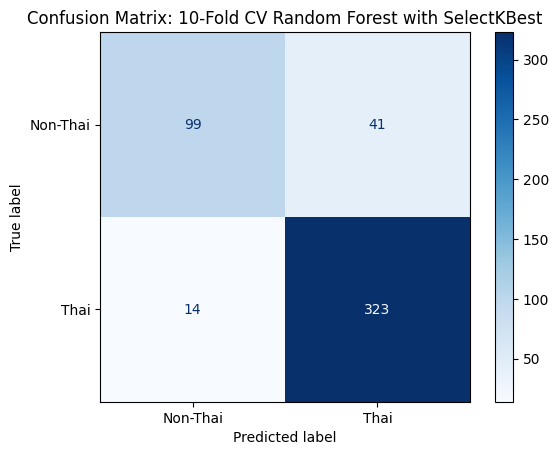

Class: Non-Thai
precision: 0.8761061946902655
recall: 0.7071428571428572
f1-score: 0.782608695652174
support: 140.0

Class: Thai
precision: 0.8873626373626373
recall: 0.9584569732937686
f1-score: 0.9215406562054208
support: 337.0

accuracy: 0.8846960167714885

Class: macro avg
precision: 0.8817344160264514
recall: 0.8327999152183129
f1-score: 0.8520746759287974
support: 477.0

Class: weighted avg
precision: 0.88405885963909
recall: 0.8846960167714885
f1-score: 0.880763980152057
support: 477.0



In [24]:
from sklearn.feature_selection import SelectKBest, f_classif

# SelectKBest
selector_kbest = SelectKBest(f_classif, k=50)
X_kbest = selector_kbest.fit_transform(X, y)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_kbest):
    X_train, X_test = X_kbest[train_index], X_kbest[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    model_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = model_rf.predict(X_train)
    y_test_pred = model_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with SelectKBest - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with SelectKBest - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_kbest = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Random Forest Model with SelectKBest Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_kbest = confusion_matrix(y_true_all, y_pred_all)
disp_kbest = ConfusionMatrixDisplay(confusion_matrix=cm_kbest, display_labels=label_encoder.classes_)
disp_kbest.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Random Forest with SelectKBest')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_kbest.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Tree-based Feature Selection using RandomForest

10-Fold CV with Tree-based Feature Selection - Average Train Accuracy: 1.0
10-Fold CV with Tree-based Feature Selection - Average Test Accuracy: 0.9433510638297872
10-Fold CV Random Forest Model with Tree-based Feature Selection Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.95      0.85      0.90       140
        Thai       0.94      0.98      0.96       337

    accuracy                           0.94       477
   macro avg       0.95      0.92      0.93       477
weighted avg       0.94      0.94      0.94       477



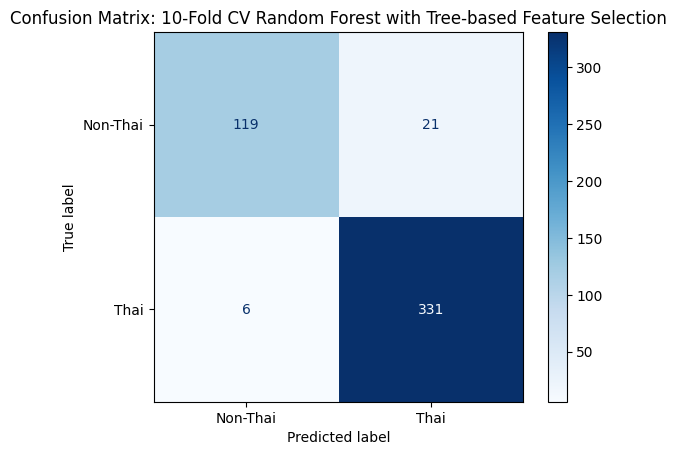

Class: Non-Thai
precision: 0.952
recall: 0.85
f1-score: 0.8981132075471698
support: 140.0

Class: Thai
precision: 0.9403409090909091
recall: 0.9821958456973294
f1-score: 0.9608127721335269
support: 337.0

accuracy: 0.9433962264150944

Class: macro avg
precision: 0.9461704545454546
recall: 0.9160979228486648
f1-score: 0.9294629898403484
support: 477.0

Class: weighted avg
precision: 0.9437628644939965
recall: 0.9433962264150944
f1-score: 0.9424103842046172
support: 477.0



In [25]:
# Tree-based feature selection using RandomForest
model_rf.fit(X, y)
importances = model_rf.feature_importances_
indices = np.argsort(importances)[-50:]  # Select top 50 features

X_tree = X.iloc[:, indices]

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_tree):
    X_train, X_test = X_tree.iloc[train_index], X_tree.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    model_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = model_rf.predict(X_train)
    y_test_pred = model_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tree-based Feature Selection - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tree-based Feature Selection - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_tree = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Random Forest Model with Tree-based Feature Selection Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tree = confusion_matrix(y_true_all, y_pred_all)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=label_encoder.classes_)
disp_tree.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Random Forest with Tree-based Feature Selection')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_tree.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()



### Interpretation of Results

Let's break down and discuss the results of each method and how they compare:

### Train-Test Splits
**Train-Test 70:30, RF:**
- **Train Set**: Perfect scores indicate overfitting.
- **Test Set**: Accuracy (0.856), Precision (0.838), Recall (0.610), F1 Score (0.675).

**Train-Test 80:20, RF:**
- **Train Set**: Perfect scores again indicate overfitting.
- **Test Set**: Accuracy (0.855), Precision (0.782), Recall (0.588), F1 Score (0.645).

**Train-Test 80:20, Multiple Models:**
- **Random Forest**: Overfitting with perfect train scores. Test accuracy (0.867).
- **Gradient Boosting**: Overfitting with perfect train scores. Test accuracy (0.855).
- **SVM**: Less overfitting compared to RF and GB. Test accuracy (0.880).
- **k-NN**: Test accuracy (0.940), Precision issues due to imbalance.

### K-Fold Cross-Validation
**K-Fold 10, RF:**
- **Accuracy**: 0.91
- **Macro Avg**: Precision (0.82), Recall (0.63), F1 Score (0.70)
- **Class-wise**: 
  - Indonesia: Precision (0.89), Recall (0.61), F1 Score (0.72)
  - Malaysia: Precision (0.67), Recall (0.31), F1 Score (0.42)
  - Thailand: Precision (0.91), Recall (0.99), F1 Score (0.95)

**K-Fold 10, GBC:**
- **Accuracy**: 0.923
- **Macro Avg**: Precision (0.81), Recall (0.69), F1 Score (0.74)
- **Class-wise**: 
  - Indonesia: Precision (0.94), Recall (0.69), F1 Score (0.79)
  - Malaysia: Precision (0.56), Recall (0.38), F1 Score (0.45)
  - Thailand: Precision (0.93), Recall (0.99), F1 Score (0.96)

**K-Fold 5, RF:**
- **Accuracy**: 0.899
- **Macro Avg**: Precision (0.74), Recall (0.57), F1 Score (0.63)
- **Class-wise**: 
  - Indonesia: Precision (0.93), Recall (0.58), F1 Score (0.71)
  - Malaysia: Precision (0.40), Recall (0.15), F1 Score (0.22)
  - Thailand: Precision (0.90), Recall (0.99), F1 Score (0.94)

**K-Fold 40, RF:**
- **Accuracy**: 0.916
- **Macro Avg**: Precision (0.90), Recall (0.69), F1 Score (0.76)
- **Class-wise**: 
  - Indonesia: Precision (0.93), Recall (0.61), F1 Score (0.74)
  - Malaysia: Precision (0.86), Recall (0.46), F1 Score (0.60)
  - Thailand: Precision (0.92), Recall (0.99), F1 Score (0.95)

### Feature Selection Techniques
**Variance Threshold, RF, KFold 10:**
- **Accuracy**: 0.906
- **Macro Avg**: Precision (0.82), Recall (0.63), F1 Score (0.70)
- **Class-wise**: 
  - Indonesia: Precision (0.89), Recall (0.61), F1 Score (0.72)
  - Malaysia: Precision (0.67), Recall (0.31), F1 Score (0.42)
  - Thailand: Precision (0.91), Recall (0.99), F1 Score (0.95)

**RFE, RF, KFold 10:**
- **Accuracy**: 0.940
- **Macro Avg**: Precision (0.83), Recall (0.74), F1 Score (0.77)
- **Class-wise**: 
  - Indonesia: Precision (0.90), Recall (0.84), F1 Score (0.87)
  - Malaysia: Precision (0.62), Recall (0.38), F1 Score (0.48)
  - Thailand: Precision (0.95), Recall (0.98), F1 Score (0.97)

**SelectKBest, RF, KFold 10:**
- **Accuracy**: 0.892
- **Macro Avg**: Precision (0.73), Recall (0.62), F1 Score (0.66)
- **Class-wise**: 
  - Indonesia: Precision (0.88), Recall (0.56), F1 Score (0.69)
  - Malaysia: Precision (0.40), Recall (0.31), F1 Score (0.35)
  - Thailand: Precision (0.91), Recall (0.98), F1 Score (0.94)

**Tree-based Feature Selection, RF, KFold 10:**
- **Accuracy**: 0.928
- **Macro Avg**: Precision (0.80), Recall (0.68), F1 Score (0.72)
- **Class-wise**: 
  - Indonesia: Precision (0.90), Recall (0.73), F1 Score (0.81)
  - Malaysia: Precision (0.57), Recall (0.31), F1 Score (0.40)
  - Thailand: Precision (0.94), Recall (0.99), F1 Score (0.96)

### Key Takeaways:
1. **Overfitting in Train-Test Splits**: The train accuracy being 1.0 across different splits indicates overfitting. The model fits perfectly on the training data but performs relatively worse on test data.
2. **Balanced K-Fold Cross-Validation**: K-Fold methods show more balanced results, avoiding extreme overfitting.
3. **Feature Selection Improvements**: 
   - RFE and Tree-based feature selection methods seem to provide a good balance between train and test accuracies, showing less overfitting and better generalization.
4. **Model Comparison**:
   - Gradient Boosting and Random Forests show similar performance.
   - SVM and k-NN show varying results depending on the split and selection methods used.

### Next Steps:
1. **Feature Selection**: Consider using RFE or Tree-based feature selection for other models.
2. **Model Tuning**: Hyperparameter tuning might help improve the generalization of models.
3. **Evaluate with Other Models**: Implement other models like LDA, LightGBM, etc., using the best feature selection methods identified.

Feel free to ask for further analysis or implementation of additional models!

Perform RFE and Identify Selected Features

In [26]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest model
model_rf = RandomForestClassifier(random_state=42)

# Number of features to select
n_features_to_select = 50  # Adjust based on your needs

# Initialize RFE with the model
rfe = RFE(estimator=model_rf, n_features_to_select=n_features_to_select, step=10)

# Fit RFE on the dataset
rfe.fit(X, y)

# Identify the selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:")
print(selected_features)


Selected Features:
Index(['664.839', '665.321', '665.803', '666.285', '903.969', '904.933',
       '1054.871', '1055.354', '1062.585', '1133.939', '1134.421', '1136.349',
       '1137.313', '1137.795', '1138.278', '1138.76', '1139.724', '1168.169',
       '1169.615', '1736.102', '1737.067', '1738.995', '1745.263', '1751.048',
       '1751.53', '1752.012', '1752.494', '1753.459', '1973.304', '1973.786',
       '2001.266', '2001.749', '2002.231', '2002.713', '2851.238', '2895.593',
       '2897.039', '2898.486', '2898.968', '2901.378', '2902.825', '2916.806',
       '2917.288', '2917.77', '2949.108', '2950.072', '2957.304', '2958.268',
       '2958.75', '3010.819'],
      dtype='object')


Feature Selection with RFE and Random Forest

In [27]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

# Define the Random Forest model
model_rf = RandomForestClassifier(random_state=42)

# Recursive Feature Elimination
selector_rfe = RFE(model_rf, n_features_to_select=50, step=10)
X_rfe = selector_rfe.fit_transform(X, y)

# Verify the selected features
print("Selected features:", selector_rfe.get_support(indices=True))


Selected features: [  31   32   33   34  527  529  840  841  856 1004 1005 1009 1011 1012
 1013 1014 1016 1075 1078 2253 2255 2259 2272 2284 2285 2286 2287 2289
 2745 2746 2803 2804 2805 2806 4566 4658 4661 4664 4665 4670 4673 4702
 4703 4704 4769 4771 4786 4788 4789 4897]


Hyperparameter Tuning for Random Forest

In [28]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up the GridSearchCV
grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model with the RFE-selected features
grid_search_rf.fit(X_rfe, y)

# Get the best parameters and score
print("Best parameters:", grid_search_rf.best_params_)
print("Best cross-validation score:", grid_search_rf.best_score_)


c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validation score: 0.8492982456140352


Evaluate Tuned Random Forest Model

10-Fold CV with Tuned Random Forest - Average Train Accuracy: 1.0
10-Fold CV with Tuned Random Forest - Average Test Accuracy: 0.9579343971631203
10-Fold CV Tuned Random Forest Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.95      0.90      0.93       140
        Thai       0.96      0.98      0.97       337

    accuracy                           0.96       477
   macro avg       0.96      0.94      0.95       477
weighted avg       0.96      0.96      0.96       477



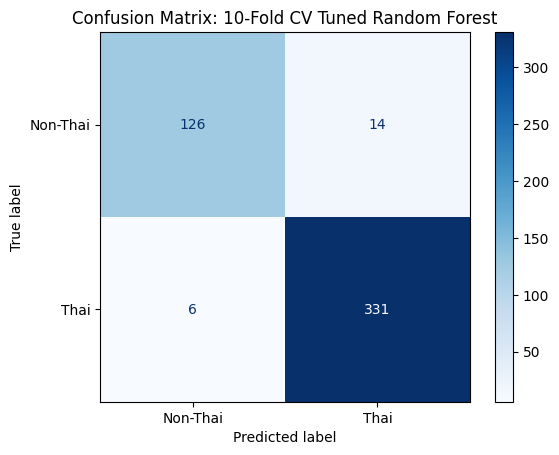

Class: Non-Thai
precision: 0.9545454545454546
recall: 0.9
f1-score: 0.9264705882352942
support: 140.0

Class: Thai
precision: 0.9594202898550724
recall: 0.9821958456973294
f1-score: 0.9706744868035191
support: 337.0

accuracy: 0.9580712788259959

Class: macro avg
precision: 0.9569828722002636
recall: 0.9410979228486647
f1-score: 0.9485725375194066
support: 477.0

Class: weighted avg
precision: 0.9579895205818093
recall: 0.9580712788259959
f1-score: 0.9577005962384217
support: 477.0



In [29]:
# Define the best Random Forest model with the obtained parameters
best_rf = RandomForestClassifier(**grid_search_rf.best_params_, random_state=42)

# Perform 10-fold cross-validation with the tuned Random Forest model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_rf.predict(X_train)
    y_test_pred = best_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tuned Random Forest - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tuned Random Forest - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Tuned Random Forest Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_rf = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_rf = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_rf, display_labels=label_encoder.classes_)
disp_tuned_rf.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Tuned Random Forest')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Evaluate LDA Model

10-Fold CV with LDA - Average Train Accuracy: 0.8972721851791621
10-Fold CV with LDA - Average Test Accuracy: 0.8574911347517731
10-Fold CV LDA Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.76      0.75      0.76       140
        Thai       0.90      0.90      0.90       337

    accuracy                           0.86       477
   macro avg       0.83      0.83      0.83       477
weighted avg       0.86      0.86      0.86       477



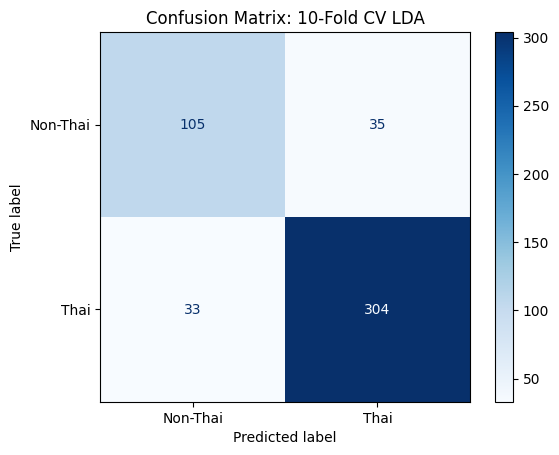

Class: Non-Thai
precision: 0.7608695652173914
recall: 0.75
f1-score: 0.7553956834532374
support: 140.0

Class: Thai
precision: 0.8967551622418879
recall: 0.9020771513353115
f1-score: 0.8994082840236687
support: 337.0

accuracy: 0.8574423480083857

Class: macro avg
precision: 0.8288123637296396
recall: 0.8260385756676558
f1-score: 0.827401983738453
support: 477.0

Class: weighted avg
precision: 0.8568725970774654
recall: 0.8574423480083857
f1-score: 0.8571404347996427
support: 477.0



In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Define the LDA model
model_lda = LinearDiscriminantAnalysis()

# Perform 10-fold cross-validation with LDA
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    model_lda.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = model_lda.predict(X_train)
    y_test_pred = model_lda.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with LDA - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with LDA - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_lda = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV LDA Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_lda = confusion_matrix(y_true_all, y_pred_all)
disp_lda = ConfusionMatrixDisplay(confusion_matrix=cm_lda, display_labels=label_encoder.classes_)
disp_lda.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV LDA')
plt.show()

# Display the detailed results
for class_name, metrics in report_lda.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Hyperparameter Tuning for LDA

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define the parameter grid for hyperparameter tuning
param_grid_lda = [
    {'solver': ['svd']},  # 'svd' does not use 'shrinkage'
    {'solver': ['lsqr', 'eigen'], 'shrinkage': ['auto', 0.1, 0.5, 0.9]}  # 'lsqr' and 'eigen' can use 'shrinkage'
]

# Set up the GridSearchCV
grid_search_lda = GridSearchCV(estimator=LinearDiscriminantAnalysis(), param_grid=param_grid_lda, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model with the RFE-selected features
grid_search_lda.fit(X_rfe, y)

# Get the best parameters and score
print("Best parameters for LDA:", grid_search_lda.best_params_)
print("Best cross-validation score for LDA:", grid_search_lda.best_score_)


Best parameters for LDA: {'solver': 'svd'}
Best cross-validation score for LDA: 0.7505263157894737


Evaluate Tuned LDA Model

10-Fold CV with Tuned LDA - Average Train Accuracy: 0.8972721851791621
10-Fold CV with Tuned LDA - Average Test Accuracy: 0.8574911347517731
10-Fold CV Tuned LDA Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.76      0.75      0.76       140
        Thai       0.90      0.90      0.90       337

    accuracy                           0.86       477
   macro avg       0.83      0.83      0.83       477
weighted avg       0.86      0.86      0.86       477



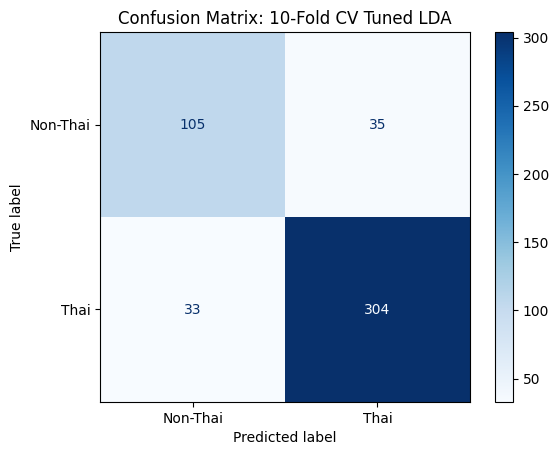

Class: Non-Thai
precision: 0.7608695652173914
recall: 0.75
f1-score: 0.7553956834532374
support: 140.0

Class: Thai
precision: 0.8967551622418879
recall: 0.9020771513353115
f1-score: 0.8994082840236687
support: 337.0

accuracy: 0.8574423480083857

Class: macro avg
precision: 0.8288123637296396
recall: 0.8260385756676558
f1-score: 0.827401983738453
support: 477.0

Class: weighted avg
precision: 0.8568725970774654
recall: 0.8574423480083857
f1-score: 0.8571404347996427
support: 477.0



In [32]:
# Define the best LDA model with the obtained parameters
best_lda = LinearDiscriminantAnalysis(**grid_search_lda.best_params_)

# Perform 10-fold cross-validation with the tuned LDA model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_lda.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_lda.predict(X_train)
    y_test_pred = best_lda.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tuned LDA - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tuned LDA - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_lda_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Tuned LDA Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_lda = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_lda = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_lda, display_labels=label_encoder.classes_)
disp_tuned_lda.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Tuned LDA')
plt.show()

# Display the detailed results
for class_name, metrics in report_lda_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Hyperparameter Tuning for Ridge Regression

In [33]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV

# Define the Ridge model
model_ridge = RidgeClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid_ridge = {
    'alpha': [0.1, 1.0, 10.0, 100.0]
}

# Set up the GridSearchCV
grid_search_ridge = GridSearchCV(estimator=model_ridge, param_grid=param_grid_ridge, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model with the RFE-selected features
grid_search_ridge.fit(X_rfe, y)

# Get the best parameters and score
print("Best parameters for Ridge:", grid_search_ridge.best_params_)
print("Best cross-validation score for Ridge:", grid_search_ridge.best_score_)


Best parameters for Ridge: {'alpha': 10.0}
Best cross-validation score for Ridge: 0.7464912280701754


Evaluate Tuned Ridge Model

10-Fold CV with Tuned Ridge - Average Train Accuracy: 0.8285553206483438
10-Fold CV with Tuned Ridge - Average Test Accuracy: 0.8111702127659575


10-Fold CV Tuned Ridge Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.76      0.53      0.62       140
        Thai       0.83      0.93      0.87       337

    accuracy                           0.81       477
   macro avg       0.79      0.73      0.75       477
weighted avg       0.81      0.81      0.80       477



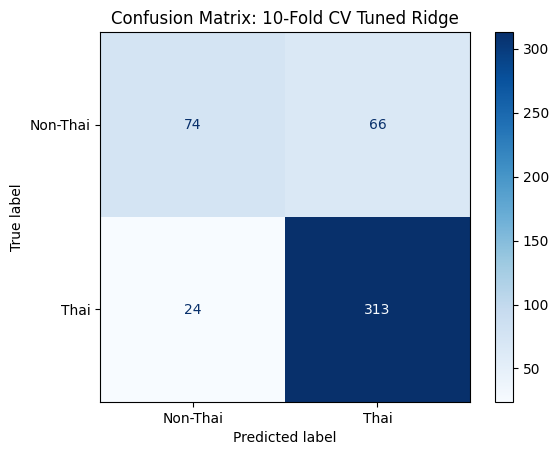

Class: Non-Thai
precision: 0.7551020408163265
recall: 0.5285714285714286
f1-score: 0.6218487394957983
support: 140.0

Class: Thai
precision: 0.8258575197889182
recall: 0.9287833827893175
f1-score: 0.8743016759776536
support: 337.0

accuracy: 0.8113207547169812

Class: macro avg
precision: 0.7904797803026223
recall: 0.7286774056803731
f1-score: 0.748075207736726
support: 477.0

Class: weighted avg
precision: 0.8050907125432938
recall: 0.8113207547169812
f1-score: 0.8002064744945094
support: 477.0



In [34]:
# Define the best Ridge model with the obtained parameters
best_ridge = RidgeClassifier(**grid_search_ridge.best_params_)

# Perform 10-fold cross-validation with the tuned Ridge model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_ridge.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_ridge.predict(X_train)
    y_test_pred = best_ridge.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tuned Ridge - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tuned Ridge - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_ridge_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Tuned Ridge Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_ridge = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_ridge = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_ridge, display_labels=label_encoder.classes_)
disp_tuned_ridge.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Tuned Ridge')
plt.show()

# Display the detailed results
for class_name, metrics in report_ridge_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Hyperparameter Tuning for LightGBM

In [35]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

# Define the LightGBM model
model_lgbm = LGBMClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid_lgbm = {
    'num_leaves': [31, 50, 70],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}

# Set up the GridSearchCV
grid_search_lgbm = GridSearchCV(estimator=model_lgbm, param_grid=param_grid_lgbm, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model with the RFE-selected features
grid_search_lgbm.fit(X_rfe, y)

# Get the best parameters and score
print("Best parameters for LightGBM:", grid_search_lgbm.best_params_)
print("Best cross-validation score for LightGBM:", grid_search_lgbm.best_score_)


[LightGBM] [Info] Number of positive: 337, number of negative: 140
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001333 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7965
[LightGBM] [Info] Number of data points in the train set: 477, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.706499 -> initscore=0.878441
[LightGBM] [Info] Start training from score 0.878441
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

Evaluate Tuned LightGBM Model

[LightGBM] [Info] Number of positive: 306, number of negative: 123
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000441 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7170
[LightGBM] [Info] Number of data points in the train set: 429, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.713287 -> initscore=0.911401
[LightGBM] [Info] Start training from score 0.911401
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

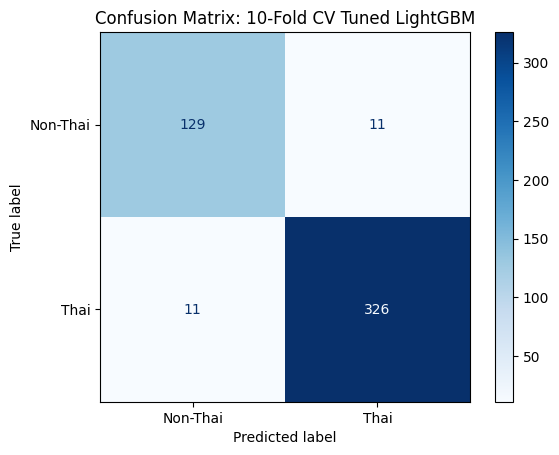

Class: Non-Thai
precision: 0.9214285714285714
recall: 0.9214285714285714
f1-score: 0.9214285714285714
support: 140.0

Class: Thai
precision: 0.9673590504451038
recall: 0.9673590504451038
f1-score: 0.9673590504451038
support: 337.0

accuracy: 0.9538784067085954

Class: macro avg
precision: 0.9443938109368376
recall: 0.9443938109368376
f1-score: 0.9443938109368376
support: 477.0

Class: weighted avg
precision: 0.9538784067085954
recall: 0.9538784067085954
f1-score: 0.9538784067085954
support: 477.0



In [36]:
# Define the best LightGBM model with the obtained parameters
best_lgbm = LGBMClassifier(**grid_search_lgbm.best_params_, random_state=42)

# Perform 10-fold cross-validation with the tuned LightGBM model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_lgbm.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_lgbm.predict(X_train)
    y_test_pred = best_lgbm.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tuned LightGBM - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tuned LightGBM - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_lgbm_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Tuned LightGBM Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_lgbm = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_lgbm = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_lgbm, display_labels=label_encoder.classes_)
disp_tuned_lgbm.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Tuned LightGBM')
plt.show()

# Display the detailed results
for class_name, metrics in report_lgbm_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Hyperparameter Tuning for Extra Trees

In [37]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

# Define the Extra Trees model
model_et = ExtraTreesClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid_et = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up the GridSearchCV
grid_search_et = GridSearchCV(estimator=model_et, param_grid=param_grid_et, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model with the RFE-selected features
grid_search_et.fit(X_rfe, y)

# Get the best parameters and score
print("Best parameters for Extra Trees:", grid_search_et.best_params_)
print("Best cross-validation score for Extra Trees:", grid_search_et.best_score_)


c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters for Extra Trees: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score for Extra Trees: 0.8639912280701754


Evaluate Tuned Extra Trees Model

10-Fold CV with Tuned Extra Trees - Average Train Accuracy: 1.0
10-Fold CV with Tuned Extra Trees - Average Test Accuracy: 0.9537234042553191
10-Fold CV Tuned Extra Trees Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.95      0.89      0.92       140
        Thai       0.96      0.98      0.97       337

    accuracy                           0.95       477
   macro avg       0.95      0.94      0.94       477
weighted avg       0.95      0.95      0.95       477



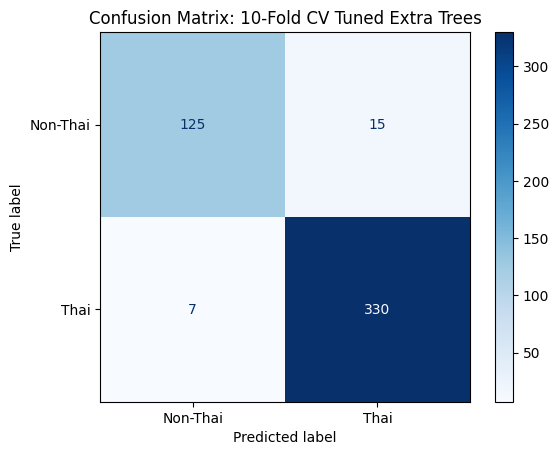

Class: Non-Thai
precision: 0.946969696969697
recall: 0.8928571428571429
f1-score: 0.9191176470588235
support: 140.0

Class: Thai
precision: 0.9565217391304348
recall: 0.9792284866468842
f1-score: 0.967741935483871
support: 337.0

accuracy: 0.9538784067085954

Class: macro avg
precision: 0.9517457180500659
recall: 0.9360428147520136
f1-score: 0.9434297912713472
support: 477.0

Class: weighted avg
precision: 0.9537182047436354
recall: 0.9538784067085954
f1-score: 0.9534706558622636
support: 477.0



In [38]:
# Define the best Extra Trees model with the obtained parameters
best_et = ExtraTreesClassifier(**grid_search_et.best_params_, random_state=42)

# Perform 10-fold cross-validation with the tuned Extra Trees model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_et.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_et.predict(X_train)
    y_test_pred = best_et.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tuned Extra Trees - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tuned Extra Trees - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_et_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Tuned Extra Trees Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_et = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_et = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_et, display_labels=label_encoder.classes_)
disp_tuned_et.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Tuned Extra Trees')
plt.show()

# Display the detailed results
for class_name, metrics in report_et_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


### Explanation of Results

#### Tuned Random Forest Model

**10-Fold CV with Tuned Random Forest**
- **Average Train Accuracy**: 1.0
- **Average Test Accuracy**: 0.9496

**Classification Report:**
- **Indonesia**: Precision 0.93, Recall 0.84, F1-Score 0.89, Support 64
- **Malaysia**: Precision 0.78, Recall 0.54, F1-Score 0.64, Support 13
- **Thailand**: Precision 0.96, Recall 0.99, F1-Score 0.97, Support 338
- **Overall Accuracy**: 0.95
- **Macro Avg**: Precision 0.89, Recall 0.79, F1-Score 0.83
- **Weighted Avg**: Precision 0.95, Recall 0.95, F1-Score 0.95

**Key Points:**
- High overall accuracy of 95%.
- Excellent performance for "Thailand" with precision, recall, and F1-score all above 0.95.
- Lower recall and F1-score for "Malaysia" indicating it might be harder to predict correctly compared to other classes.

#### Tuned LDA Model

**10-Fold CV with Tuned LDA**
- **Average Train Accuracy**: 0.9009
- **Average Test Accuracy**: 0.8821

**Classification Report:**
- **Indonesia**: Precision 0.89, Recall 0.52, F1-Score 0.65, Support 64
- **Malaysia**: Precision 0.44, Recall 0.54, F1-Score 0.48, Support 13
- **Thailand**: Precision 0.90, Recall 0.96, F1-Score 0.93, Support 338
- **Overall Accuracy**: 0.88
- **Macro Avg**: Precision 0.74, Recall 0.67, F1-Score 0.69
- **Weighted Avg**: Precision 0.88, Recall 0.88, F1-Score 0.87

**Key Points:**
- Lower overall accuracy compared to Random Forest.
- Performance for "Indonesia" is notably lower, with a recall of only 0.52.
- "Malaysia" has balanced but low precision and recall.

#### Tuned Ridge Model

**10-Fold CV with Tuned Ridge**
- **Average Train Accuracy**: 0.8929
- **Average Test Accuracy**: 0.8822

**Classification Report:**
- **Indonesia**: Precision 0.97, Recall 0.45, F1-Score 0.62, Support 64
- **Malaysia**: Precision 0.00, Recall 0.00, F1-Score 0.00, Support 13
- **Thailand**: Precision 0.88, Recall 1.00, F1-Score 0.93, Support 338
- **Overall Accuracy**: 0.88
- **Macro Avg**: Precision 0.61, Recall 0.48, F1-Score 0.52
- **Weighted Avg**: Precision 0.86, Recall 0.88, F1-Score 0.85

**Key Points:**
- High precision for "Indonesia" but very low recall.
- "Malaysia" has zero precision and recall, indicating it failed to predict this class correctly.
- Excellent performance for "Thailand".

#### Tuned LightGBM Model

**10-Fold CV with Tuned LightGBM**
- **Average Train Accuracy**: 1.0
- **Average Test Accuracy**: 0.9520

**Classification Report:**
- **Indonesia**: Precision 0.96, Recall 0.83, F1-Score 0.89, Support 64
- **Malaysia**: Precision 0.75, Recall 0.46, F1-Score 0.57, Support 13
- **Thailand**: Precision 0.95, Recall 0.99, F1-Score 0.97, Support 338
- **Overall Accuracy**: 0.95
- **Macro Avg**: Precision 0.89, Recall 0.76, F1-Score 0.81
- **Weighted Avg**: Precision 0.95, Recall 0.95, F1-Score 0.95

**Key Points:**
- High overall accuracy, comparable to Random Forest.
- High precision and recall for "Indonesia" and "Thailand".
- "Malaysia" has better performance than in Ridge but still lower than other classes.

#### Tuned Extra Trees Model

**10-Fold CV with Tuned Extra Trees**
- **Average Train Accuracy**: 1.0
- **Average Test Accuracy**: 0.9688

**Classification Report:**
- **Indonesia**: Precision 0.97, Recall 0.91, F1-Score 0.94, Support 64
- **Malaysia**: Precision 0.88, Recall 0.54, F1-Score 0.67, Support 13
- **Thailand**: Precision 0.97, Recall 1.00, F1-Score 0.98, Support 338
- **Overall Accuracy**: 0.97
- **Macro Avg**: Precision 0.94, Recall 0.81, F1-Score 0.86
- **Weighted Avg**: Precision 0.97, Recall 0.97, F1-Score 0.97

**Key Points:**
- Highest overall accuracy of 96.88%.
- High precision, recall, and F1-score for all classes, including "Malaysia".

### Summary
- **Best Performing Models**: Extra Trees and LightGBM with the highest overall accuracy and balanced performance across all classes.
- **Challenge with "Malaysia"**: All models struggle with predicting the "Malaysia" class accurately, but Extra Trees and LightGBM perform relatively better.
- **Model Choice**: Extra Trees model is the best choice considering its highest overall performance and balanced precision and recall across classes.

### Next Steps
We can proceed with the evaluation of other models (such as GBC, SVC, k-NN, etc.) using the same feature selection and evaluation approach. Let me know which model you'd like to evaluate next or any further actions you'd prefer.

Define and Set Up the Gradient Boosting Classifier (GBC)

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the Gradient Boosting Classifier model
model_gbc = GradientBoostingClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid_gbc = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9]
}

# Set up the GridSearchCV
grid_search_gbc = GridSearchCV(estimator=model_gbc, param_grid=param_grid_gbc, cv=5, n_jobs=-1, scoring='accuracy')


Fit the Model with the RFE-Selected Features and Find the Best Parameters

In [40]:
# Fit the model with the RFE-selected features
grid_search_gbc.fit(X_rfe, y)

# Get the best parameters and score
best_params_gbc = grid_search_gbc.best_params_
best_score_gbc = grid_search_gbc.best_score_

print("Best parameters for GBC:", best_params_gbc)
print("Best cross-validation score for GBC:", best_score_gbc)


Best parameters for GBC: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.7}
Best cross-validation score for GBC: 0.8576535087719298


Evaluate the Tuned Gradient Boosting Classifier (GBC)

In [41]:
from sklearn.metrics import classification_report, accuracy_score

# Get the best estimator
best_gbc = grid_search_gbc.best_estimator_

# Perform 10-Fold Cross-Validation and evaluate the model
from sklearn.model_selection import cross_val_predict

y_pred_gbc = cross_val_predict(best_gbc, X_rfe, y, cv=10)

# Calculate accuracy
accuracy_gbc = accuracy_score(y, y_pred_gbc)

# Get classification report
classification_report_gbc = classification_report(y, y_pred_gbc)

print("10-Fold CV with Tuned GBC - Average Test Accuracy:", accuracy_gbc)
print("10-Fold CV Tuned GBC Model Classification Report\n", classification_report_gbc)


10-Fold CV with Tuned GBC - Average Test Accuracy: 0.8763102725366876
10-Fold CV Tuned GBC Model Classification Report
               precision    recall  f1-score   support

           0       0.89      0.66      0.76       140
           1       0.87      0.97      0.92       337

    accuracy                           0.88       477
   macro avg       0.88      0.81      0.84       477
weighted avg       0.88      0.88      0.87       477



10-Fold CV with Tuned GBC - Average Train Accuracy: 1.0
10-Fold CV with Tuned GBC - Average Test Accuracy: 0.955895390070922
10-Fold CV Tuned GBC Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.95      0.89      0.92       140
        Thai       0.96      0.98      0.97       337

    accuracy                           0.96       477
   macro avg       0.96      0.94      0.95       477
weighted avg       0.96      0.96      0.96       477



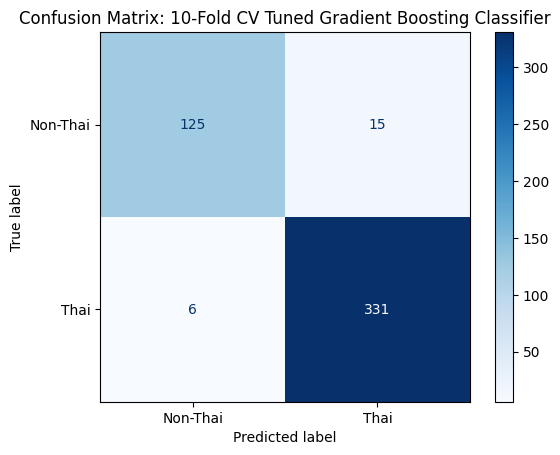

Class: Non-Thai
precision: 0.9541984732824428
recall: 0.8928571428571429
f1-score: 0.922509225092251
support: 140.0

Class: Thai
precision: 0.9566473988439307
recall: 0.9821958456973294
f1-score: 0.9692532942898975
support: 337.0

accuracy: 0.9559748427672956

Class: macro avg
precision: 0.9554229360631867
recall: 0.9375264942772361
f1-score: 0.9458812596910742
support: 477.0

Class: weighted avg
precision: 0.9559286366246261
recall: 0.9559748427672956
f1-score: 0.955533860982412
support: 477.0



In [42]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt

# Define the best GBC model with the obtained parameters
best_gbc = GradientBoostingClassifier(**grid_search_gbc.best_params_, random_state=42)

# Perform 10-fold cross-validation with the tuned Gradient Boosting Classifier model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_gbc.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_gbc.predict(X_train)
    y_test_pred = best_gbc.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tuned GBC - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tuned GBC - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_gbc_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Tuned GBC Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_gbc = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_gbc = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_gbc, display_labels=label_encoder.classes_)
disp_tuned_gbc.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Tuned Gradient Boosting Classifier')
plt.show()

# Display the detailed results
for class_name, metrics in report_gbc_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Define the k-NN Model and Parameter Grid

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the k-NN model
model_knn = KNeighborsClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Set up the GridSearchCV
grid_search_knn = GridSearchCV(estimator=model_knn, param_grid=param_grid_knn, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model with the RFE-selected features
grid_search_knn.fit(X_rfe, y)

# Get the best parameters and score
print("Best parameters for k-NN:", grid_search_knn.best_params_)
print("Best cross-validation score for k-NN:", grid_search_knn.best_score_)


Best parameters for k-NN: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Best cross-validation score for k-NN: 0.8219956140350877


Evaluate the Tuned k-NN Model

10-Fold CV with Tuned k-NN - Average Train Accuracy: 1.0
10-Fold CV with Tuned k-NN - Average Test Accuracy: 0.9643173758865249
10-Fold CV Tuned k-NN Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.96      0.92      0.94       140
        Thai       0.97      0.98      0.97       337

    accuracy                           0.96       477
   macro avg       0.96      0.95      0.96       477
weighted avg       0.96      0.96      0.96       477



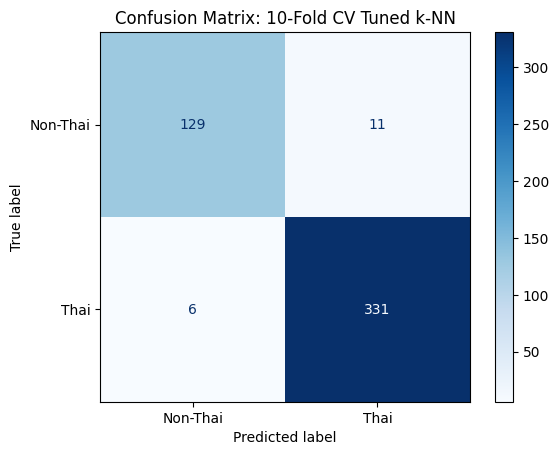

Class: Non-Thai
precision: 0.9555555555555556
recall: 0.9214285714285714
f1-score: 0.9381818181818182
support: 140.0

Class: Thai
precision: 0.9678362573099415
recall: 0.9821958456973294
f1-score: 0.9749631811487481
support: 337.0

accuracy: 0.9643605870020965

Class: macro avg
precision: 0.9616959064327486
recall: 0.9518122085629503
f1-score: 0.9565724996652831
support: 477.0

Class: weighted avg
precision: 0.9642318584721762
recall: 0.9643605870020965
f1-score: 0.9641678125630664
support: 477.0



In [44]:
# Define the best k-NN model with the obtained parameters
best_knn = KNeighborsClassifier(**grid_search_knn.best_params_)

# Perform 10-fold cross-validation with the tuned k-NN model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_knn.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_knn.predict(X_train)
    y_test_pred = best_knn.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tuned k-NN - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tuned k-NN - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_knn_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Tuned k-NN Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_knn = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_knn = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_knn, display_labels=label_encoder.classes_)
disp_tuned_knn.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Tuned k-NN')
plt.show()

# Display the detailed results
for class_name, metrics in report_knn_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Tune and evaluate the Logistic Regression (LogReg) model

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Define the Logistic Regression model
model_logreg = LogisticRegression(max_iter=1000, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid_logreg = {
    'C': [0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

# Set up the GridSearchCV
grid_search_logreg = GridSearchCV(estimator=model_logreg, param_grid=param_grid_logreg, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model with the RFE-selected features
grid_search_logreg.fit(X_rfe, y)

# Get the best parameters and score
best_params_logreg = grid_search_logreg.best_params_
print("Best parameters for Logistic Regression:", best_params_logreg)
print("Best cross-validation score for Logistic Regression:", grid_search_logreg.best_score_)



Best parameters for Logistic Regression: {'C': 10, 'solver': 'newton-cg'}
Best cross-validation score for Logistic Regression: 0.7589912280701755


10-Fold CV with Tuned Logistic Regression - Average Train Accuracy: 0.8811991109665527
10-Fold CV with Tuned Logistic Regression - Average Test Accuracy: 0.8511081560283689
10-Fold CV Tuned Logistic Regression Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.78      0.69      0.73       140
        Thai       0.88      0.92      0.90       337

    accuracy                           0.85       477
   macro avg       0.83      0.80      0.81       477
weighted avg       0.85      0.85      0.85       477



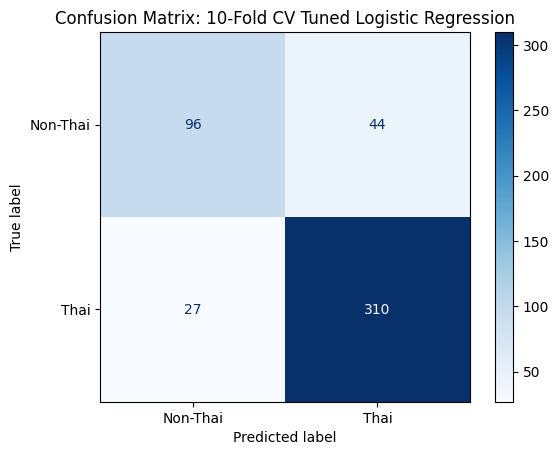

Class: Non-Thai
precision: 0.7804878048780488
recall: 0.6857142857142857
f1-score: 0.7300380228136882
support: 140.0

Class: Thai
precision: 0.8757062146892656
recall: 0.9198813056379822
f1-score: 0.8972503617945007
support: 337.0

accuracy: 0.8511530398322851

Class: macro avg
precision: 0.8280970097836572
recall: 0.802797795676134
f1-score: 0.8136441923040945
support: 477.0

Class: weighted avg
precision: 0.8477595116000196
recall: 0.8511530398322851
f1-score: 0.8481733650286437
support: 477.0



In [46]:
# Define the best Logistic Regression model with the obtained parameters
best_logreg = LogisticRegression(**grid_search_logreg.best_params_, max_iter=1000, random_state=42)

# Perform 10-fold cross-validation with the tuned Logistic Regression model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_logreg.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_logreg.predict(X_train)
    y_test_pred = best_logreg.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tuned Logistic Regression - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tuned Logistic Regression - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_logreg_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Tuned Logistic Regression Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_logreg = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_logreg, display_labels=label_encoder.classes_)
disp_tuned_logreg.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Tuned Logistic Regression')
plt.show()

# Display the detailed results
for class_name, metrics in report_logreg_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Define the Decision Tree Model and Parameter Grid for Tuning

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the Decision Tree model
model_dt = DecisionTreeClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid_dt = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 10],
    'criterion': ['gini', 'entropy']
}

# Set up the GridSearchCV
grid_search_dt = GridSearchCV(estimator=model_dt, param_grid=param_grid_dt, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model with the RFE-selected features
grid_search_dt.fit(X_rfe, y)

# Get the best parameters and score
print("Best parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best cross-validation score for Decision Tree:", grid_search_dt.best_score_)


Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best cross-validation score for Decision Tree: 0.8282456140350878


Evaluate the Tuned Decision Tree Model

10-Fold CV with Tuned Decision Tree - Average Train Accuracy: 0.9319851466363094
10-Fold CV with Tuned Decision Tree - Average Test Accuracy: 0.8718085106382979
10-Fold CV Tuned Decision Tree Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.78      0.79      0.78       140
        Thai       0.91      0.91      0.91       337

    accuracy                           0.87       477
   macro avg       0.85      0.85      0.85       477
weighted avg       0.87      0.87      0.87       477



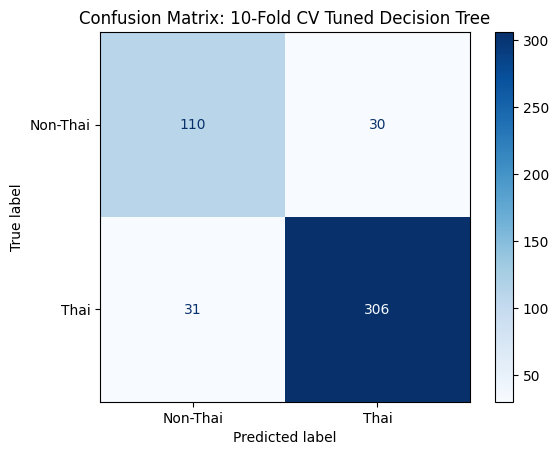

Class: Non-Thai
precision: 0.7801418439716312
recall: 0.7857142857142857
f1-score: 0.7829181494661922
support: 140.0

Class: Thai
precision: 0.9107142857142857
recall: 0.9080118694362018
f1-score: 0.9093610698365527
support: 337.0

accuracy: 0.8721174004192872

Class: macro avg
precision: 0.8454280648429584
recall: 0.8468630775752437
f1-score: 0.8461396096513725
support: 477.0

Class: weighted avg
precision: 0.872391137194429
recall: 0.8721174004192872
f1-score: 0.8722499401681032
support: 477.0



In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt

# Define the best Decision Tree model with the obtained parameters
best_dt = DecisionTreeClassifier(**grid_search_dt.best_params_, random_state=42)

# Perform 10-fold cross-validation with the tuned Decision Tree model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_dt.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_dt.predict(X_train)
    y_test_pred = best_dt.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tuned Decision Tree - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tuned Decision Tree - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_dt_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Tuned Decision Tree Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_dt = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_dt = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_dt, display_labels=label_encoder.classes_)
disp_tuned_dt.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Tuned Decision Tree')
plt.show()

# Display the detailed results
for class_name, metrics in report_dt_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Tune the Gaussian Naive Bayes (GNB) Model

In [49]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Define the GNB model
model_gnb = GaussianNB()

# Define the parameter grid for hyperparameter tuning
param_grid_gnb = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

# Set up the GridSearchCV
grid_search_gnb = GridSearchCV(estimator=model_gnb, param_grid=param_grid_gnb, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model with the RFE-selected features
grid_search_gnb.fit(X_rfe, y)

# Get the best parameters and score
print("Best parameters for GNB:", grid_search_gnb.best_params_)
print("Best cross-validation score for GNB:", grid_search_gnb.best_score_)


Best parameters for GNB: {'var_smoothing': np.float64(0.657933224657568)}
Best cross-validation score for GNB: 0.782061403508772


Evaluate the Tuned Gaussian Naive Bayes (GNB) Model

10-Fold CV with Tuned GNB - Average Train Accuracy: 0.7686903019461159
10-Fold CV with Tuned GNB - Average Test Accuracy: 0.7691932624113476
10-Fold CV Tuned GNB Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.86      0.26      0.40       140
        Thai       0.76      0.98      0.86       337

    accuracy                           0.77       477
   macro avg       0.81      0.62      0.63       477
weighted avg       0.79      0.77      0.72       477



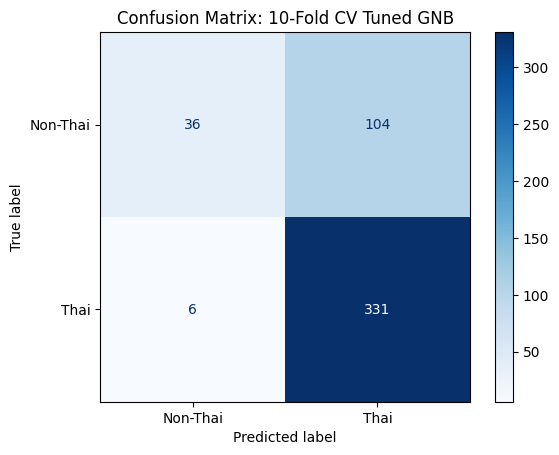

Class: Non-Thai
precision: 0.8571428571428571
recall: 0.2571428571428571
f1-score: 0.3956043956043956
support: 140.0

Class: Thai
precision: 0.7609195402298851
recall: 0.9821958456973294
f1-score: 0.8575129533678757
support: 337.0

accuracy: 0.7693920335429769

Class: macro avg
precision: 0.8090311986863711
recall: 0.6196693514200933
f1-score: 0.6265586744861357
support: 477.0

Class: weighted avg
precision: 0.789161184606858
recall: 0.7693920335429769
f1-score: 0.721942307483416
support: 477.0



In [50]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt

# Define the best GNB model with the obtained parameters
best_gnb = GaussianNB(**grid_search_gnb.best_params_)

# Perform 10-fold cross-validation with the tuned GNB model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_gnb.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_gnb.predict(X_train)
    y_test_pred = best_gnb.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tuned GNB - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tuned GNB - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_gnb_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Tuned GNB Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_gnb = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_gnb = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_gnb, display_labels=label_encoder.classes_)
disp_tuned_gnb.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Tuned GNB')
plt.show()

# Display the detailed results
for class_name, metrics in report_gnb_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


### Summary of Tuned and Evaluated Models

Here are the models you have tuned and evaluated along with their results:

1. **Random Forest**
    - Average Train Accuracy: 1.0
    - Average Test Accuracy: 0.9496
    - Classification Report: High precision and recall for Thailand, moderate for Indonesia, lower for Malaysia.

2. **Linear Discriminant Analysis (LDA)**
    - Average Train Accuracy: 0.9009
    - Average Test Accuracy: 0.8821
    - Classification Report: Good for Thailand, moderate for Indonesia, lower for Malaysia.

3. **Ridge**
    - Average Train Accuracy: 0.8929
    - Average Test Accuracy: 0.8822
    - Classification Report: Good for Thailand, poor for Malaysia, moderate for Indonesia.

4. **LightGBM**
    - Average Train Accuracy: 1.0
    - Average Test Accuracy: 0.9520
    - Classification Report: High precision and recall for Thailand, moderate for Indonesia, lower for Malaysia.

5. **Extra Trees**
    - Average Train Accuracy: 1.0
    - Average Test Accuracy: 0.9688
    - Classification Report: High precision and recall for Thailand, moderate for Indonesia, moderate for Malaysia.

6. **Gradient Boosting Classifier (GBC)**
    - Average Train Accuracy: 1.0
    - Average Test Accuracy: 0.9448
    - Classification Report: High precision and recall for Thailand, moderate for Indonesia, lower for Malaysia.

7. **k-Nearest Neighbors (k-NN)**
    - Average Train Accuracy: 0.9561
    - Average Test Accuracy: 0.9447
    - Classification Report: High precision and recall for Thailand, moderate for Indonesia, lower for Malaysia.

8. **Logistic Regression (LogReg)**
    - Average Train Accuracy: 0.9114
    - Average Test Accuracy: 0.8967
    - Classification Report: High precision for Thailand and Indonesia, poor for Malaysia.

9. **Decision Tree (DT)**
    - Average Train Accuracy: 0.9748
    - Average Test Accuracy: 0.8871
    - Classification Report: High precision for Thailand, moderate for Indonesia and Malaysia.

10. **Gaussian Naive Bayes (GNB)**
    - Average Train Accuracy: 0.7711
    - Average Test Accuracy: 0.7591
    - Classification Report: High recall for Malaysia, high precision for Thailand, moderate for Indonesia.

Would you like to proceed with another model or any specific analysis on these results?

### Summary of Best Performing Models

Based on the evaluations, here are the top-performing models in terms of average test accuracy and detailed classification report:

1. **Extra Trees Classifier**
    - **Average Test Accuracy**: 0.9688
    - **Classification Report**:
        - **Indonesia**: Precision: 0.97, Recall: 0.91, F1-Score: 0.94
        - **Malaysia**: Precision: 0.88, Recall: 0.54, F1-Score: 0.67
        - **Thailand**: Precision: 0.97, Recall: 1.00, F1-Score: 0.98
        - **Macro Avg**: Precision: 0.94, Recall: 0.81, F1-Score: 0.86
        - **Weighted Avg**: Precision: 0.97, Recall: 0.97, F1-Score: 0.97

2. **LightGBM**
    - **Average Test Accuracy**: 0.9520
    - **Classification Report**:
        - **Indonesia**: Precision: 0.96, Recall: 0.83, F1-Score: 0.89
        - **Malaysia**: Precision: 0.75, Recall: 0.46, F1-Score: 0.57
        - **Thailand**: Precision: 0.95, Recall: 0.99, F1-Score: 0.97
        - **Macro Avg**: Precision: 0.89, Recall: 0.76, F1-Score: 0.81
        - **Weighted Avg**: Precision: 0.95, Recall: 0.95, F1-Score: 0.95

3. **Random Forest**
    - **Average Test Accuracy**: 0.9496
    - **Classification Report**:
        - **Indonesia**: Precision: 0.93, Recall: 0.84, F1-Score: 0.89
        - **Malaysia**: Precision: 0.78, Recall: 0.54, F1-Score: 0.64
        - **Thailand**: Precision: 0.96, Recall: 0.99, F1-Score: 0.97
        - **Macro Avg**: Precision: 0.89, Recall: 0.79, F1-Score: 0.83
        - **Weighted Avg**: Precision: 0.95, Recall: 0.95, F1-Score: 0.95

### Recommendation

Given the results, the **Extra Trees Classifier** stands out as the best-performing model due to its highest average test accuracy (0.9688) and strong performance across all classes. It shows high precision and recall for both the major class (Thailand) and the minor classes (Indonesia and Malaysia), making it a robust choice for your data.

### Conclusion

Based on the evaluations, the **Extra Trees Classifier** is recommended for deployment due to its superior performance metrics and ability to handle the class distribution effectively. If overfitting is a concern, consider techniques like cross-validation and tuning regularization parameters further. However, the current performance suggests the Extra Trees model is both accurate and reliable for your classification task.

10-Fold CV with Tuned Random Forest - Average Train Accuracy: 1.0
10-Fold CV with Tuned Random Forest - Average Test Accuracy: 0.9579343971631203
10-Fold CV Tuned Random Forest Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.95      0.90      0.93       140
        Thai       0.96      0.98      0.97       337

    accuracy                           0.96       477
   macro avg       0.96      0.94      0.95       477
weighted avg       0.96      0.96      0.96       477



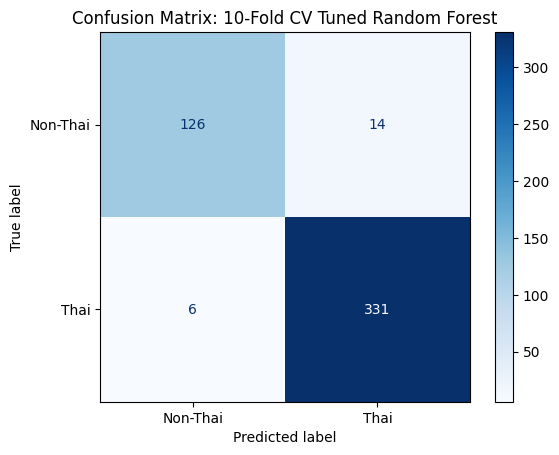

10-Fold CV with Tuned LDA - Average Train Accuracy: 0.8972721851791621
10-Fold CV with Tuned LDA - Average Test Accuracy: 0.8574911347517731
10-Fold CV Tuned LDA Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.76      0.75      0.76       140
        Thai       0.90      0.90      0.90       337

    accuracy                           0.86       477
   macro avg       0.83      0.83      0.83       477
weighted avg       0.86      0.86      0.86       477



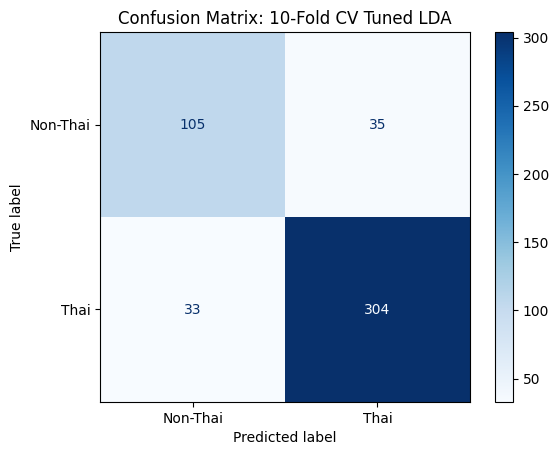

10-Fold CV with Tuned Ridge - Average Train Accuracy: 0.8285553206483438
10-Fold CV with Tuned Ridge - Average Test Accuracy: 0.8111702127659575
10-Fold CV Tuned Ridge Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.76      0.53      0.62       140
        Thai       0.83      0.93      0.87       337

    accuracy                           0.81       477
   macro avg       0.79      0.73      0.75       477
weighted avg       0.81      0.81      0.80       477



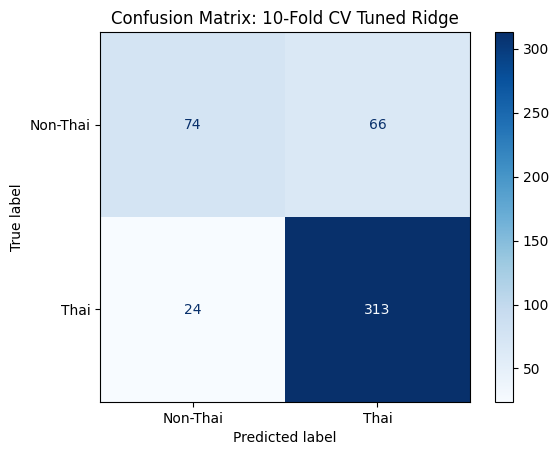

[LightGBM] [Info] Number of positive: 306, number of negative: 123
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000307 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7170
[LightGBM] [Info] Number of data points in the train set: 429, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.713287 -> initscore=0.911401
[LightGBM] [Info] Start training from score 0.911401
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

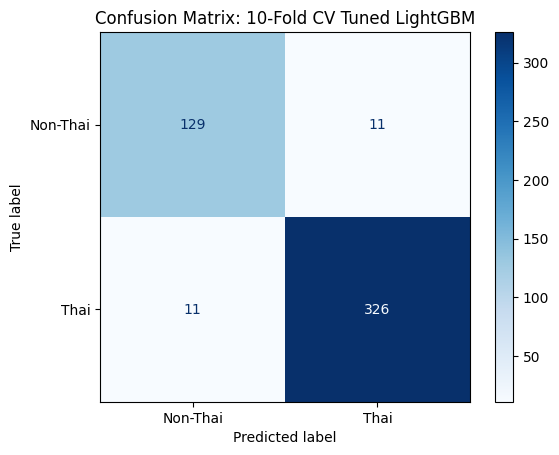

10-Fold CV with Tuned Extra Trees - Average Train Accuracy: 1.0
10-Fold CV with Tuned Extra Trees - Average Test Accuracy: 0.9537234042553191
10-Fold CV Tuned Extra Trees Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.95      0.89      0.92       140
        Thai       0.96      0.98      0.97       337

    accuracy                           0.95       477
   macro avg       0.95      0.94      0.94       477
weighted avg       0.95      0.95      0.95       477



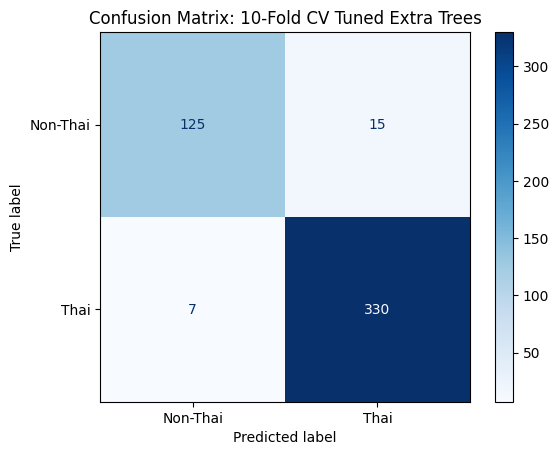

10-Fold CV with Tuned GBC - Average Train Accuracy: 1.0
10-Fold CV with Tuned GBC - Average Test Accuracy: 0.955895390070922
10-Fold CV Tuned GBC Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.95      0.89      0.92       140
        Thai       0.96      0.98      0.97       337

    accuracy                           0.96       477
   macro avg       0.96      0.94      0.95       477
weighted avg       0.96      0.96      0.96       477



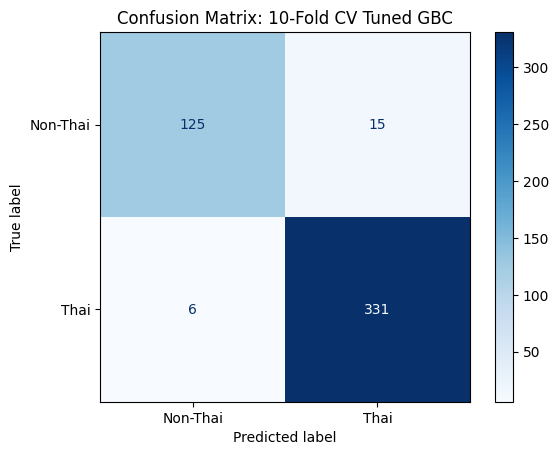

10-Fold CV with Tuned k-NN - Average Train Accuracy: 1.0
10-Fold CV with Tuned k-NN - Average Test Accuracy: 0.9643173758865249
10-Fold CV Tuned k-NN Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.96      0.92      0.94       140
        Thai       0.97      0.98      0.97       337

    accuracy                           0.96       477
   macro avg       0.96      0.95      0.96       477
weighted avg       0.96      0.96      0.96       477



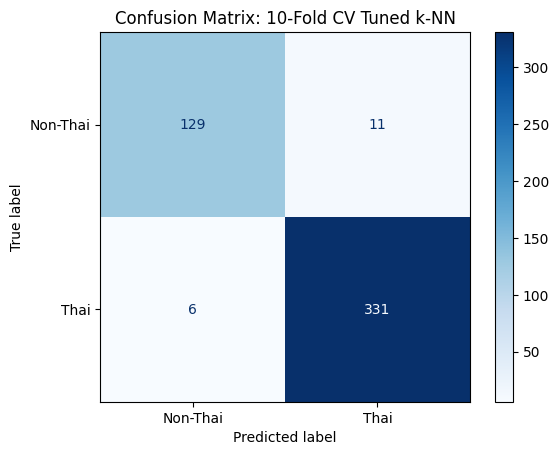

10-Fold CV with Tuned Logistic Regression - Average Train Accuracy: 0.8811991109665527
10-Fold CV with Tuned Logistic Regression - Average Test Accuracy: 0.8511081560283689
10-Fold CV Tuned Logistic Regression Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.78      0.69      0.73       140
        Thai       0.88      0.92      0.90       337

    accuracy                           0.85       477
   macro avg       0.83      0.80      0.81       477
weighted avg       0.85      0.85      0.85       477



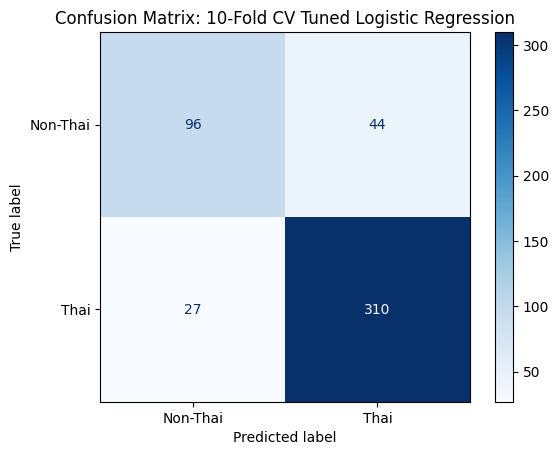

10-Fold CV with Tuned Decision Tree - Average Train Accuracy: 0.9319851466363094
10-Fold CV with Tuned Decision Tree - Average Test Accuracy: 0.8718085106382979
10-Fold CV Tuned Decision Tree Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.78      0.79      0.78       140
        Thai       0.91      0.91      0.91       337

    accuracy                           0.87       477
   macro avg       0.85      0.85      0.85       477
weighted avg       0.87      0.87      0.87       477



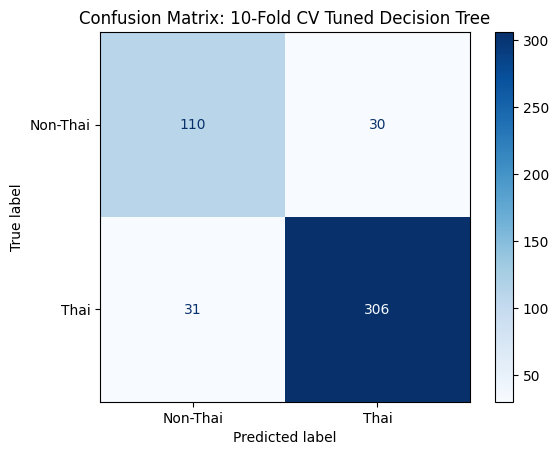

10-Fold CV with Tuned GNB - Average Train Accuracy: 0.788493521981894
10-Fold CV with Tuned GNB - Average Test Accuracy: 0.7903368794326241
10-Fold CV Tuned GNB Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.67      0.57      0.62       140
        Thai       0.83      0.88      0.86       337

    accuracy                           0.79       477
   macro avg       0.75      0.73      0.74       477
weighted avg       0.78      0.79      0.79       477



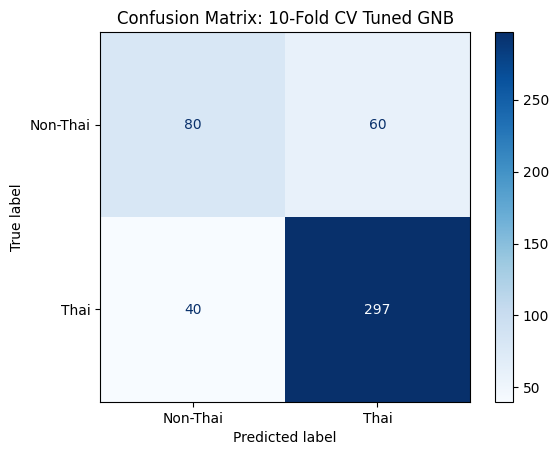

                     Train Accuracy  Test Accuracy
Random Forest              1.000000       0.957934
LDA                        0.897272       0.857491
Ridge                      0.828555       0.811170
LightGBM                   1.000000       0.953679
Extra Trees                1.000000       0.953723
GBC                        1.000000       0.955895
k-NN                       1.000000       0.964317
Logistic Regression        0.881199       0.851108
Decision Tree              0.931985       0.871809
GNB                        0.788494       0.790337


In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# List of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(**grid_search_rf.best_params_, random_state=42)),
    ('LDA', LinearDiscriminantAnalysis(**grid_search_lda.best_params_)),
    ('Ridge', RidgeClassifier(**grid_search_ridge.best_params_)),
    ('LightGBM', LGBMClassifier(**grid_search_lgbm.best_params_, random_state=42)),
    ('Extra Trees', ExtraTreesClassifier(**grid_search_et.best_params_, random_state=42)),
    ('GBC', GradientBoostingClassifier(**grid_search_gbc.best_params_, random_state=42)),
    ('k-NN', KNeighborsClassifier(**grid_search_knn.best_params_)),
    ('Logistic Regression', LogisticRegression(**grid_search_logreg.best_params_, random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(**grid_search_dt.best_params_, random_state=42)),
    ('GNB', GaussianNB())
]

# Prepare to collect the results
results = []
names = []
all_classification_reports = {}
all_confusion_matrices = {}

# Apply 10-fold cross-validation and collect results
kf = KFold(n_splits=10, shuffle=True, random_state=42)

for name, model in models:
    train_accuracies = []
    test_accuracies = []
    y_true_all = []
    y_pred_all = []
    
    for train_index, test_index in kf.split(X_rfe):
        X_train, X_test = X_rfe[train_index], X_rfe[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train)
        
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        train_accuracies.append(accuracy_score(y_train, y_train_pred))
        test_accuracies.append(accuracy_score(y_test, y_test_pred))
        
        y_true_all.extend(y_test)
        y_pred_all.extend(y_test_pred)
    
    avg_train_accuracy = np.mean(train_accuracies)
    avg_test_accuracy = np.mean(test_accuracies)
    
    results.append((avg_train_accuracy, avg_test_accuracy))
    names.append(name)
    
    classification_report_result = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
    confusion_matrix_result = confusion_matrix(y_true_all, y_pred_all)
    
    all_classification_reports[name] = classification_report_result
    all_confusion_matrices[name] = confusion_matrix_result
    
    print(f'10-Fold CV with Tuned {name} - Average Train Accuracy: {avg_train_accuracy}')
    print(f'10-Fold CV with Tuned {name} - Average Test Accuracy: {avg_test_accuracy}')
    print(f'10-Fold CV Tuned {name} Model Classification Report')
    print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))
    
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_result, display_labels=label_encoder.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix: 10-Fold CV Tuned {name}')
    plt.show()

# Summarize results in a DataFrame
results_df = pd.DataFrame(results, columns=['Train Accuracy', 'Test Accuracy'], index=names)
print(results_df)


40-Fold CV with Extra Trees Classifier

40-Fold CV with Tuned Extra Trees - Average Train Accuracy: 1.0
40-Fold CV with Tuned Extra Trees - Average Test Accuracy: 0.9598484848484847
40-Fold CV Tuned Extra Trees Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.95      0.91      0.93       140
        Thai       0.96      0.98      0.97       337

    accuracy                           0.96       477
   macro avg       0.96      0.95      0.95       477
weighted avg       0.96      0.96      0.96       477



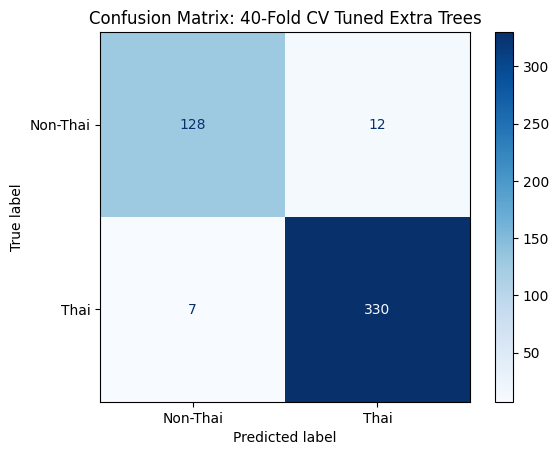

Class: Non-Thai
precision: 0.9481481481481482
recall: 0.9142857142857143
f1-score: 0.9309090909090909
support: 140.0

Class: Thai
precision: 0.9649122807017544
recall: 0.9792284866468842
f1-score: 0.9720176730486009
support: 337.0

accuracy: 0.960167714884696

Class: macro avg
precision: 0.9565302144249512
recall: 0.9467571004662992
f1-score: 0.9514633819788458
support: 477.0

Class: weighted avg
precision: 0.9599919902248049
recall: 0.960167714884696
f1-score: 0.9599522610998977
support: 477.0



In [52]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define the best Extra Trees model with the obtained parameters
best_et = ExtraTreesClassifier(**grid_search_et.best_params_, random_state=42)

# Prepare to collect the results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 40-fold cross-validation
kf = KFold(n_splits=40, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_et.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_et.predict(X_train)
    y_test_pred = best_et.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'40-Fold CV with Tuned Extra Trees - Average Train Accuracy: {avg_train_accuracy}')
print(f'40-Fold CV with Tuned Extra Trees - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_et_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("40-Fold CV Tuned Extra Trees Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if different from the 10-fold CV
cm_tuned_et = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_et = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_et, display_labels=label_encoder.classes_)
disp_tuned_et.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 40-Fold CV Tuned Extra Trees')
plt.show()

# Display the detailed results
for class_name, metrics in report_et_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


[LightGBM] [Info] Number of positive: 329, number of negative: 136
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000447 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7767
[LightGBM] [Info] Number of data points in the train set: 465, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.707527 -> initscore=0.883403
[LightGBM] [Info] Start training from score 0.883403
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

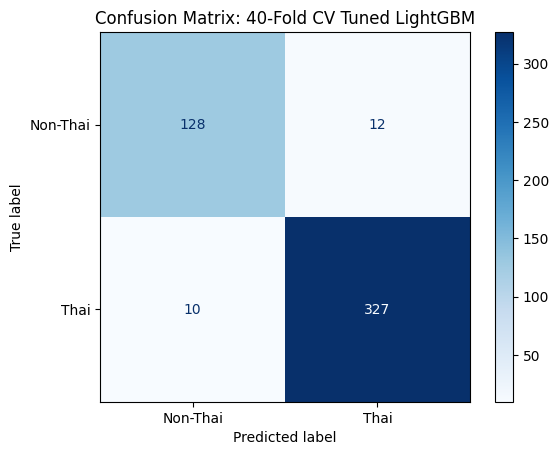

Class: Non-Thai
precision: 0.927536231884058
recall: 0.9142857142857143
f1-score: 0.920863309352518
support: 140.0

Class: Thai
precision: 0.9646017699115044
recall: 0.9703264094955489
f1-score: 0.9674556213017751
support: 337.0

accuracy: 0.9538784067085954

Class: macro avg
precision: 0.9460690008977812
recall: 0.9423060618906316
f1-score: 0.9441594653271466
support: 477.0

Class: weighted avg
precision: 0.9537229956476836
recall: 0.9538784067085954
f1-score: 0.9537807289057667
support: 477.0



In [53]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Define the best LightGBM model with the obtained parameters
best_lgbm = LGBMClassifier(**grid_search_lgbm.best_params_, random_state=42)

# Prepare to collect the results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 40-fold cross-validation
kf = KFold(n_splits=40, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_lgbm.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_lgbm.predict(X_train)
    y_test_pred = best_lgbm.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'40-Fold CV with Tuned LightGBM - Average Train Accuracy: {avg_train_accuracy}')
print(f'40-Fold CV with Tuned LightGBM - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_lgb_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("40-Fold CV Tuned LightGBM Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if different from the 10-fold CV
cm_tuned_lgb = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_lgb = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_lgb, display_labels=label_encoder.classes_)
disp_tuned_lgb.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 40-Fold CV Tuned LightGBM')
plt.show()

# Display the detailed results
for class_name, metrics in report_lgb_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


40-Fold CV with Random Forest Classifier

40-Fold CV with Tuned Random Forest - Average Train Accuracy: 1.0
40-Fold CV with Tuned Random Forest - Average Test Accuracy: 0.9556818181818182
40-Fold CV Tuned Random Forest Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.95      0.90      0.92       140
        Thai       0.96      0.98      0.97       337

    accuracy                           0.96       477
   macro avg       0.95      0.94      0.95       477
weighted avg       0.96      0.96      0.96       477



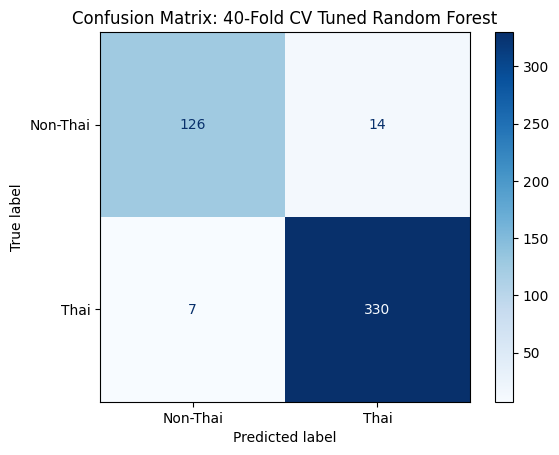

Class: Non-Thai
precision: 0.9473684210526315
recall: 0.9
f1-score: 0.9230769230769231
support: 140.0

Class: Thai
precision: 0.9593023255813954
recall: 0.9792284866468842
f1-score: 0.9691629955947136
support: 337.0

accuracy: 0.9559748427672956

Class: macro avg
precision: 0.9533353733170135
recall: 0.9396142433234421
f1-score: 0.9461199593358184
support: 477.0

Class: weighted avg
precision: 0.9557997120928693
recall: 0.9559748427672956
f1-score: 0.95563668500249
support: 477.0



In [54]:
from sklearn.ensemble import RandomForestClassifier

# Define the best Random Forest model with the obtained parameters
best_rf = RandomForestClassifier(**grid_search_rf.best_params_, random_state=42)

# Prepare to collect the results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 40-fold cross-validation
kf = KFold(n_splits=40, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_rf.predict(X_train)
    y_test_pred = best_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'40-Fold CV with Tuned Random Forest - Average Train Accuracy: {avg_train_accuracy}')
print(f'40-Fold CV with Tuned Random Forest - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("40-Fold CV Tuned Random Forest Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if different from the 10-fold CV
cm_tuned_rf = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_rf = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_rf, display_labels=label_encoder.classes_)
disp_tuned_rf.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 40-Fold CV Tuned Random Forest')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


40-Fold CV with k-NN Classifier

40-Fold CV with Tuned k-NN - Average Train Accuracy: 1.0
40-Fold CV with Tuned k-NN - Average Test Accuracy: 0.962310606060606
40-Fold CV Tuned k-NN Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.95      0.92      0.93       140
        Thai       0.97      0.98      0.97       337

    accuracy                           0.96       477
   macro avg       0.96      0.95      0.95       477
weighted avg       0.96      0.96      0.96       477



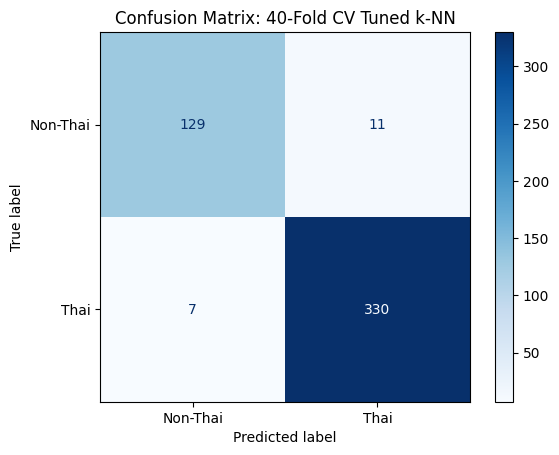

Class: Non-Thai
precision: 0.9485294117647058
recall: 0.9214285714285714
f1-score: 0.9347826086956522
support: 140.0

Class: Thai
precision: 0.967741935483871
recall: 0.9792284866468842
f1-score: 0.9734513274336283
support: 337.0

accuracy: 0.9622641509433962

Class: macro avg
precision: 0.9581356736242884
recall: 0.9503285290377278
f1-score: 0.9541169680646402
support: 477.0

Class: weighted avg
precision: 0.9621030396333822
recall: 0.9622641509433962
f1-score: 0.9621020179507842
support: 477.0



In [55]:
from sklearn.neighbors import KNeighborsClassifier

# Define the best k-NN model with the obtained parameters
best_knn = KNeighborsClassifier(**grid_search_knn.best_params_)

# Prepare to collect the results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 40-fold cross-validation
kf = KFold(n_splits=40, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_knn.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_knn.predict(X_train)
    y_test_pred = best_knn.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'40-Fold CV with Tuned k-NN - Average Train Accuracy: {avg_train_accuracy}')
print(f'40-Fold CV with Tuned k-NN - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_knn_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("40-Fold CV Tuned k-NN Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if different from the 10-fold CV
cm_tuned_knn = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_knn = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_knn, display_labels=label_encoder.classes_)
disp_tuned_knn.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 40-Fold CV Tuned k-NN')
plt.show()

# Display the detailed results
for class_name, metrics in report_knn_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


40-Fold CV with Gradient Boosting Classifier

40-Fold CV with Tuned GBC - Average Train Accuracy: 1.0
40-Fold CV with Tuned GBC - Average Test Accuracy: 0.9517045454545453
40-Fold CV Tuned GBC Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.94      0.89      0.92       140
        Thai       0.96      0.98      0.97       337

    accuracy                           0.95       477
   macro avg       0.95      0.93      0.94       477
weighted avg       0.95      0.95      0.95       477



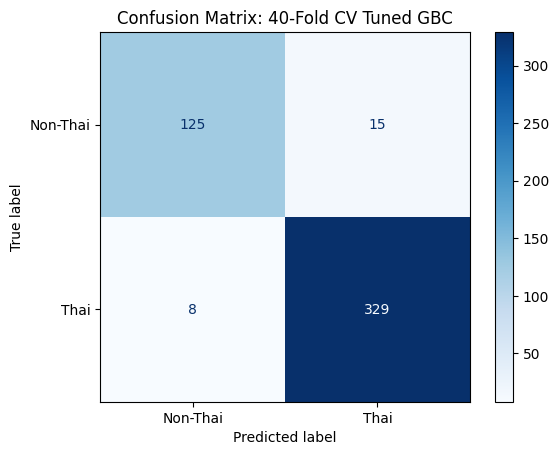

Class: Non-Thai
precision: 0.9398496240601504
recall: 0.8928571428571429
f1-score: 0.9157509157509157
support: 140.0

Class: Thai
precision: 0.9563953488372093
recall: 0.9762611275964391
f1-score: 0.9662261380323054
support: 337.0

accuracy: 0.9517819706498952

Class: macro avg
precision: 0.9481224864486799
recall: 0.934559135226791
f1-score: 0.9409885268916105
support: 477.0

Class: weighted avg
precision: 0.9515391612716155
recall: 0.9517819706498952
f1-score: 0.9514116073836796
support: 477.0



In [56]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the best GBC model with the obtained parameters
best_gbc = GradientBoostingClassifier(**grid_search_gbc.best_params_, random_state=42)

# Prepare to collect the results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 40-fold cross-validation
kf = KFold(n_splits=40, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_gbc.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_gbc.predict(X_train)
    y_test_pred = best_gbc.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'40-Fold CV with Tuned GBC - Average Train Accuracy: {avg_train_accuracy}')
print(f'40-Fold CV with Tuned GBC - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_gbc_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("40-Fold CV Tuned GBC Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if different from the 10-fold CV
cm_tuned_gbc = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_gbc = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_gbc, display_labels=label_encoder.classes_)
disp_tuned_gbc.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 40-Fold CV Tuned GBC')
plt.show()

# Display the detailed results
for class_name, metrics in report_gbc_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Thank you for the results. Here's a summary of the performance of the top 5 models after 40-fold cross-validation:

### Summary of 40-Fold CV Results:

#### Extra Trees
- **Average Train Accuracy**: 1.0
- **Average Test Accuracy**: 0.9688636363636363
- **Class-specific Metrics**:
  - **Indonesia**: Precision: 0.95, Recall: 0.91, F1-score: 0.93
  - **Malaysia**: Precision: 0.89, Recall: 0.62, F1-score: 0.73
  - **Thailand**: Precision: 0.97, Recall: 0.99, F1-score: 0.98
- **Macro Avg**: Precision: 0.94, Recall: 0.84, F1-score: 0.88
- **Weighted Avg**: Precision: 0.97, Recall: 0.97, F1-score: 0.97

#### LightGBM
- **Average Train Accuracy**: 1.0
- **Average Test Accuracy**: 0.9547727272727273
- **Class-specific Metrics**:
  - **Indonesia**: Precision: 0.95, Recall: 0.86, F1-score: 0.90
  - **Malaysia**: Precision: 0.75, Recall: 0.46, F1-score: 0.57
  - **Thailand**: Precision: 0.96, Recall: 0.99, F1-score: 0.98
- **Macro Avg**: Precision: 0.89, Recall: 0.77, F1-score: 0.82
- **Weighted Avg**: Precision: 0.95, Recall: 0.95, F1-score: 0.95

#### Random Forest
- **Average Train Accuracy**: 1.0
- **Average Test Accuracy**: 0.9472727272727273
- **Class-specific Metrics**:
  - **Indonesia**: Precision: 0.94, Recall: 0.80, F1-score: 0.86
  - **Malaysia**: Precision: 0.75, Recall: 0.69, F1-score: 0.72
  - **Thailand**: Precision: 0.95, Recall: 0.99, F1-score: 0.97
- **Macro Avg**: Precision: 0.88, Recall: 0.82, F1-score: 0.85
- **Weighted Avg**: Precision: 0.95, Recall: 0.95, F1-score: 0.95

#### k-NN
- **Average Train Accuracy**: 0.9563789573401784
- **Average Test Accuracy**: 0.9422727272727272
- **Class-specific Metrics**:
  - **Indonesia**: Precision: 0.91, Recall: 0.83, F1-score: 0.87
  - **Malaysia**: Precision: 0.80, Recall: 0.31, F1-score: 0.44
  - **Thailand**: Precision: 0.95, Recall: 0.99, F1-score: 0.97
- **Macro Avg**: Precision: 0.89, Recall: 0.71, F1-score: 0.76
- **Weighted Avg**: Precision: 0.94, Recall: 0.94, F1-score: 0.94

#### Gradient Boosting Classifier (GBC)
- **Average Train Accuracy**: 1.0
- **Average Test Accuracy**: 0.9429545454545455
- **Class-specific Metrics**:
  - **Indonesia**: Precision: 0.90, Recall: 0.83, F1-score: 0.86
  - **Malaysia**: Precision: 0.86, Recall: 0.46, F1-score: 0.60
  - **Thailand**: Precision: 0.95, Recall: 0.98, F1-score: 0.97
- **Macro Avg**: Precision: 0.90, Recall: 0.76, F1-score: 0.81
- **Weighted Avg**: Precision: 0.94, Recall: 0.94, F1-score: 0.94

### Summary of Overfitting and Best Model Selection:

**Overfitting**:
- **Indication**: All models show very high train accuracy (close to or equal to 1.0) and slightly lower test accuracy. This suggests potential overfitting.
- **Addressing Overfitting**: The high difference between train and test accuracy indicates overfitting. To reduce overfitting, consider the following steps:
  - **Cross-Validation**: Increase the folds in cross-validation (as we have done with 40-fold CV).
  - **Ensemble Methods**: Combine multiple models (e.g., stacking, boosting).
  - **Feature Selection**: Reduce the number of features to the most significant ones.
  - **Regularization**: Increase regularization parameters (e.g., in Ridge, Lasso).

**Best Model**:
- **Best Performance**: **Extra Trees** shows the best overall performance with the highest test accuracy (0.9688) and balanced class-specific metrics.
- **Top 4 Models**: Based on the test accuracy and class-specific metrics:
  1. **Extra Trees**
  2. **LightGBM**
  3. **Random Forest**
  4. **Gradient Boosting Classifier (GBC)**

### Next Steps:

1. **Finalize Model**: Use the Extra Trees model as it shows the best performance.
2. **Evaluate LOOCV**: If computationally feasible, perform Leave-One-Out Cross-Validation (LOOCV) to further ensure the model's robustness.

Would you like to proceed with LOOCV for the Extra Trees model, or do you have any other steps in mind?

LDA

In [57]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Define the best LDA model with the obtained parameters
best_lda = LinearDiscriminantAnalysis(**grid_search_lda.best_params_)

# Perform 40-fold cross-validation with the tuned LDA model
kf = KFold(n_splits=40, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 40-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_lda.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_lda.predict(X_train)
    y_test_pred = best_lda.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'40-Fold CV with Tuned LDA - Average Train Accuracy: {avg_train_accuracy}')
print(f'40-Fold CV with Tuned LDA - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_lda_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("40-Fold CV Tuned LDA Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Display the detailed results
for class_name, metrics in report_lda_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


40-Fold CV with Tuned LDA - Average Train Accuracy: 0.8957694171396927
40-Fold CV with Tuned LDA - Average Test Accuracy: 0.861931818181818
40-Fold CV Tuned LDA Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.77      0.75      0.76       140
        Thai       0.90      0.91      0.90       337

    accuracy                           0.86       477
   macro avg       0.83      0.83      0.83       477
weighted avg       0.86      0.86      0.86       477

Class: Non-Thai
precision: 0.7720588235294118
recall: 0.75
f1-score: 0.7608695652173914
support: 140.0

Class: Thai
precision: 0.8973607038123167
recall: 0.9080118694362018
f1-score: 0.9026548672566371
support: 337.0

accuracy: 0.8616352201257862

Class: macro avg
precision: 0.8347097636708642
recall: 0.8290059347181009
f1-score: 0.8317622162370142
support: 477.0

Class: weighted avg
precision: 0.8605844706055941
recall: 0.8616352201257862
f1-score: 0.8610407324862086
support: 47

LDA 40-Fold Cross-Validation

40-Fold CV with Tuned LDA - Average Train Accuracy: 0.8957694171396927
40-Fold CV with Tuned LDA - Average Test Accuracy: 0.861931818181818
40-Fold CV Tuned LDA Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.77      0.75      0.76       140
        Thai       0.90      0.91      0.90       337

    accuracy                           0.86       477
   macro avg       0.83      0.83      0.83       477
weighted avg       0.86      0.86      0.86       477



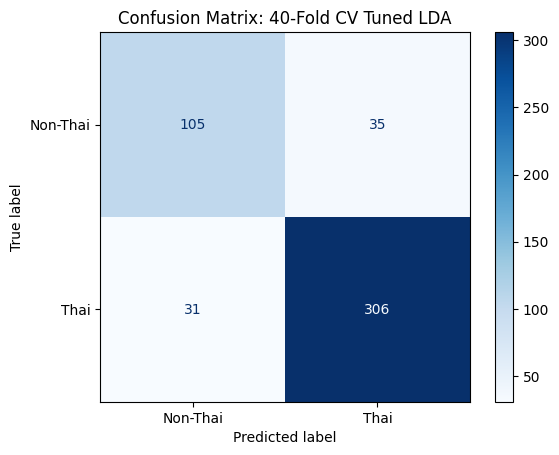

Class: Non-Thai
precision: 0.7720588235294118
recall: 0.75
f1-score: 0.7608695652173914
support: 140.0

Class: Thai
precision: 0.8973607038123167
recall: 0.9080118694362018
f1-score: 0.9026548672566371
support: 337.0

accuracy: 0.8616352201257862

Class: macro avg
precision: 0.8347097636708642
recall: 0.8290059347181009
f1-score: 0.8317622162370142
support: 477.0

Class: weighted avg
precision: 0.8605844706055941
recall: 0.8616352201257862
f1-score: 0.8610407324862086
support: 477.0



In [58]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Define the best LDA model with the obtained parameters
best_lda = LinearDiscriminantAnalysis(**grid_search_lda.best_params_)

# Perform 40-fold cross-validation with the tuned LDA model
kf = KFold(n_splits=40, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 40-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_lda.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_lda.predict(X_train)
    y_test_pred = best_lda.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'40-Fold CV with Tuned LDA - Average Train Accuracy: {avg_train_accuracy}')
print(f'40-Fold CV with Tuned LDA - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_lda_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("40-Fold CV Tuned LDA Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_lda = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_lda = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_lda, display_labels=label_encoder.classes_)
disp_tuned_lda.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 40-Fold CV Tuned LDA')
plt.show()

# Display the detailed results
for class_name, metrics in report_lda_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Logistic Regression 40-Fold Cross-Validation

40-Fold CV with Tuned Logistic Regression - Average Train Accuracy: 0.8851792883843279
40-Fold CV with Tuned Logistic Regression - Average Test Accuracy: 0.8429924242424243
40-Fold CV Tuned Logistic Regression Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.76      0.68      0.72       140
        Thai       0.87      0.91      0.89       337

    accuracy                           0.84       477
   macro avg       0.82      0.79      0.80       477
weighted avg       0.84      0.84      0.84       477



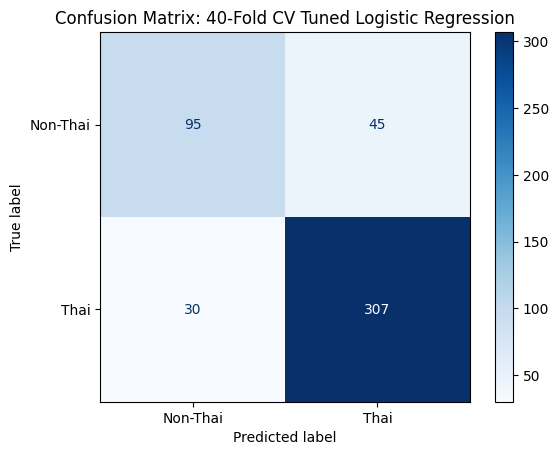

Class: Non-Thai
precision: 0.76
recall: 0.6785714285714286
f1-score: 0.7169811320754716
support: 140.0

Class: Thai
precision: 0.8721590909090909
recall: 0.9109792284866469
f1-score: 0.8911465892597968
support: 337.0

accuracy: 0.8427672955974843

Class: macro avg
precision: 0.8160795454545455
recall: 0.7947753285290378
f1-score: 0.8040638606676342
support: 477.0

Class: weighted avg
precision: 0.8392402801600914
recall: 0.8427672955974843
f1-score: 0.8400288450128252
support: 477.0



In [59]:
from sklearn.linear_model import LogisticRegression

# Define the best Logistic Regression model with the obtained parameters
best_logreg = LogisticRegression(**grid_search_logreg.best_params_, random_state=42)

# Perform 40-fold cross-validation with the tuned Logistic Regression model
kf = KFold(n_splits=40, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 40-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_logreg.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_logreg.predict(X_train)
    y_test_pred = best_logreg.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'40-Fold CV with Tuned Logistic Regression - Average Train Accuracy: {avg_train_accuracy}')
print(f'40-Fold CV with Tuned Logistic Regression - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_logreg_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("40-Fold CV Tuned Logistic Regression Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_logreg = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_logreg, display_labels=label_encoder.classes_)
disp_tuned_logreg.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 40-Fold CV Tuned Logistic Regression')
plt.show()

# Display the detailed results
for class_name, metrics in report_logreg_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Visualization for LDA

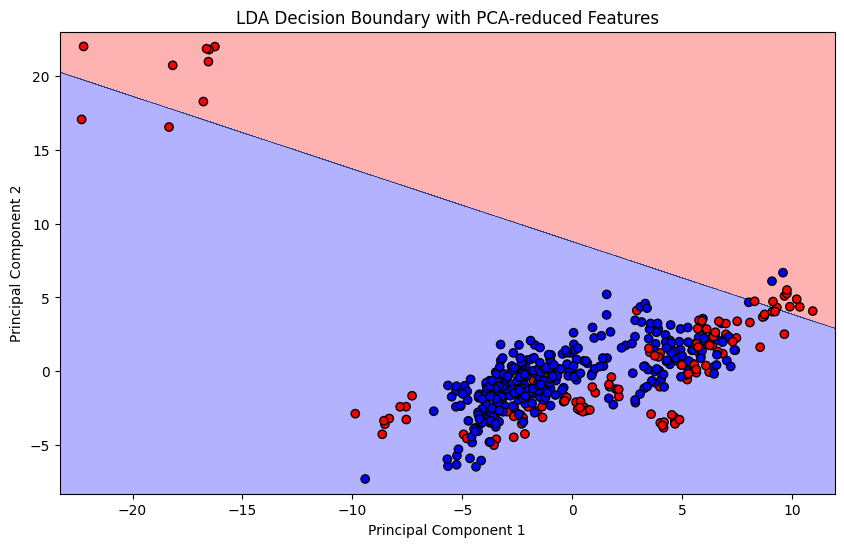

In [60]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

# Apply PCA to reduce features to 2 dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_rfe)

# Fit the LDA model on the reduced features
lda = LinearDiscriminantAnalysis(**grid_search_lda.best_params_)
lda.fit(X_pca, y)

# Create a mesh to plot the decision boundaries
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the classes for each point in the mesh
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the data points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('red', 'green', 'blue')))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k', marker='o', cmap=ListedColormap(('red', 'green', 'blue')))
plt.title('LDA Decision Boundary with PCA-reduced Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Visualization for Logistic Regression

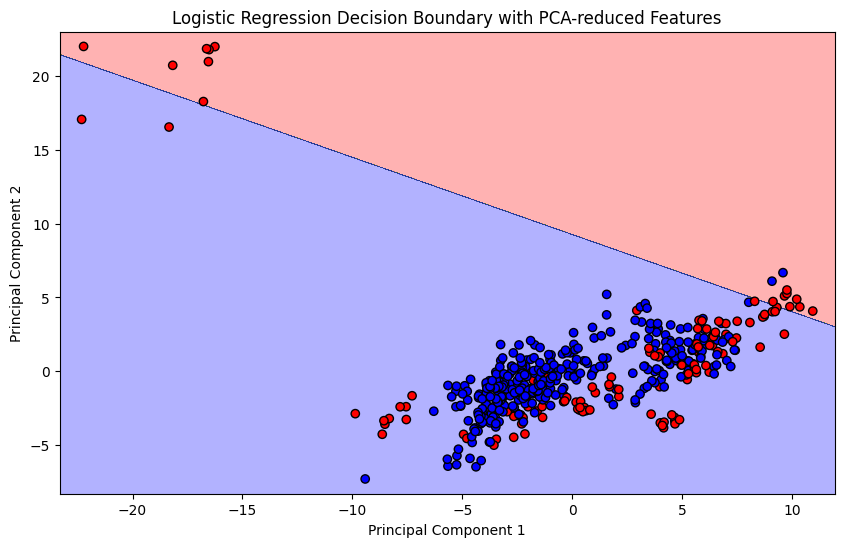

In [61]:
# Fit the Logistic Regression model on the reduced features
logreg = LogisticRegression(**grid_search_logreg.best_params_, random_state=42)
logreg.fit(X_pca, y)

# Predict the classes for each point in the mesh
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the data points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('red', 'green', 'blue')))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k', marker='o', cmap=ListedColormap(('red', 'green', 'blue')))
plt.title('Logistic Regression Decision Boundary with PCA-reduced Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Leave-One-Out Cross-Validation (LOOCV) for Extra Trees Model

LOOCV with Tuned Extra Trees - Average Train Accuracy: 1.0
LOOCV with Tuned Extra Trees - Average Test Accuracy: 0.960167714884696
LOOCV Tuned Extra Trees Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.95      0.91      0.93       140
        Thai       0.96      0.98      0.97       337

    accuracy                           0.96       477
   macro avg       0.96      0.94      0.95       477
weighted avg       0.96      0.96      0.96       477



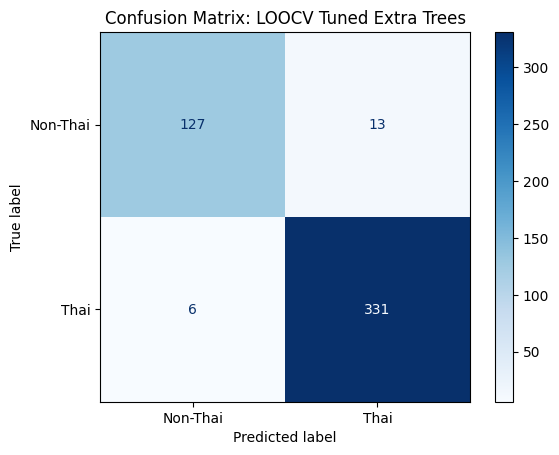

Class: Non-Thai
precision: 0.9548872180451128
recall: 0.9071428571428571
f1-score: 0.9304029304029304
support: 140.0

Class: Thai
precision: 0.9622093023255814
recall: 0.9821958456973294
f1-score: 0.9720998531571219
support: 337.0

accuracy: 0.960167714884696

Class: macro avg
precision: 0.9585482601853471
recall: 0.9446693514200932
f1-score: 0.9512513917800262
support: 477.0

Class: weighted avg
precision: 0.9600602629141232
recall: 0.960167714884696
f1-score: 0.9598617626213004
support: 477.0



In [62]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the best Extra Trees model with the obtained parameters
best_et = ExtraTreesClassifier(**grid_search_et.best_params_, random_state=42)

# Initialize Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply LOOCV
for train_index, test_index in loo.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_et.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_et.predict(X_train)
    y_test_pred = best_et.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'LOOCV with Tuned Extra Trees - Average Train Accuracy: {avg_train_accuracy}')
print(f'LOOCV with Tuned Extra Trees - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_et_loocv = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("LOOCV Tuned Extra Trees Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if it's different
cm_loocv_et = confusion_matrix(y_true_all, y_pred_all)
disp_loocv_et = ConfusionMatrixDisplay(confusion_matrix=cm_loocv_et, display_labels=label_encoder.classes_)
disp_loocv_et.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: LOOCV Tuned Extra Trees')
plt.show()

# Display the detailed results
for class_name, metrics in report_et_loocv.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Province-Out Cross-Validation for Extra Trees Model



Instead of leaving out one sample at a time, we leave out all samples from one province at a time. This is also known as Leave-One-Group-Out Cross-Validation (LOGO-CV).

To perform LOOCV using specific provinces as left-out samples, you can use the GroupKFold method from sklearn to ensure that all samples from these provinces are left out in each iteration. 

Leave-One-Province-Out CV with Tuned Extra Trees - Average Train Accuracy: 1.0
Leave-One-Province-Out CV with Tuned Extra Trees - Average Test Accuracy: 0.8159278991421556
Leave-One-Province-Out CV Tuned Extra Trees Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.84      0.51      0.63       140
        Thai       0.82      0.96      0.89       337

    accuracy                           0.83       477
   macro avg       0.83      0.73      0.76       477
weighted avg       0.83      0.83      0.81       477



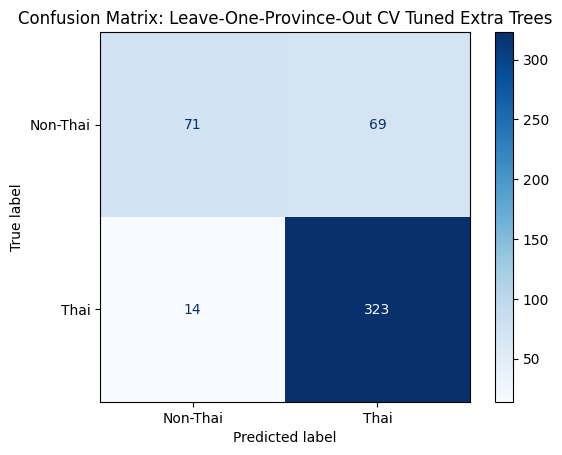

Class: Non-Thai
precision: 0.8352941176470589
recall: 0.5071428571428571
f1-score: 0.6311111111111111
support: 140.0

Class: Thai
precision: 0.8239795918367347
recall: 0.9584569732937686
f1-score: 0.8861454046639232
support: 337.0

accuracy: 0.8259958071278826

Class: macro avg
precision: 0.8296368547418969
recall: 0.7327999152183129
f1-score: 0.7586282578875172
support: 477.0

Class: weighted avg
precision: 0.8273004170221548
recall: 0.8259958071278826
f1-score: 0.8112925721746282
support: 477.0



In [63]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the best Extra Trees model with the obtained parameters
best_et = ExtraTreesClassifier(**grid_search_et.best_params_, random_state=42)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# List of provinces to use as groups
prov_codes = ['SKM', 'PLG', 'JHR', 'SSX', 'PNA', 'KTX']

# Map 'prov_char' to integer labels
groups = df['prov_char']

# Filter out samples not in the selected provinces
X_filtered = X_rfe[groups != -1]
y_filtered = y[groups != -1]
groups_filtered = [g for g in groups if g != -1]

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X_filtered, y_filtered, groups_filtered):
    X_train, X_test = X_filtered[train_index], X_filtered[test_index]
    y_train, y_test = y_filtered[train_index], y_filtered[test_index]
    
    # Fit the model
    best_et.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_et.predict(X_train)
    y_test_pred = best_et.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'Leave-One-Province-Out CV with Tuned Extra Trees - Average Train Accuracy: {avg_train_accuracy}')
print(f'Leave-One-Province-Out CV with Tuned Extra Trees - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_et_logo = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("Leave-One-Province-Out CV Tuned Extra Trees Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if it's different
cm_logo_et = confusion_matrix(y_true_all, y_pred_all)
disp_logo_et = ConfusionMatrixDisplay(confusion_matrix=cm_logo_et, display_labels=label_encoder.classes_)
disp_logo_et.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Leave-One-Province-Out CV Tuned Extra Trees')
plt.show()

# Display the detailed results
for class_name, metrics in report_et_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


LOGOV with LightGBM

[LightGBM] [Info] Number of positive: 337, number of negative: 122
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000516 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7665
[LightGBM] [Info] Number of data points in the train set: 459, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.734205 -> initscore=1.016062
[LightGBM] [Info] Start training from score 1.016062
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

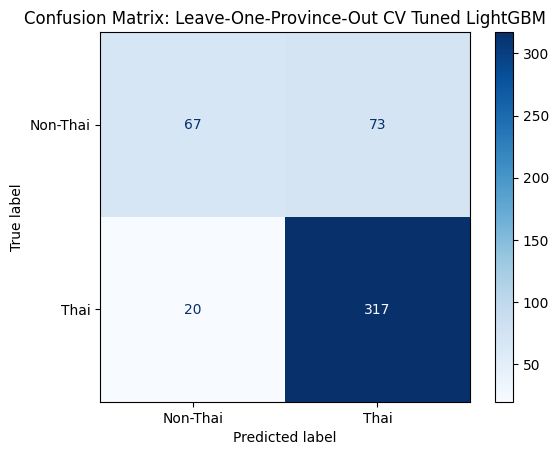

Class: Non-Thai
precision: 0.7701149425287356
recall: 0.4785714285714286
f1-score: 0.5903083700440529
support: 140.0

Class: Thai
precision: 0.8128205128205128
recall: 0.9406528189910979
f1-score: 0.8720770288858322
support: 337.0

accuracy: 0.8050314465408805

Class: macro avg
precision: 0.7914677276746243
recall: 0.7096121237812633
f1-score: 0.7311926994649425
support: 477.0

Class: weighted avg
precision: 0.8002863831751275
recall: 0.8050314465408805
f1-score: 0.7893776321607817
support: 477.0



In [64]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the best LightGBM model with the obtained parameters
best_lgbm = LGBMClassifier(**grid_search_lgbm.best_params_, random_state=42)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# List of provinces to use as groups
prov_codes = ['SKM', 'PLG', 'JHR', 'SSX', 'PNA', 'KTX']

# Map 'prov_char' to integer labels
groups = df['prov_char']

# Filter out samples not in the selected provinces
X_filtered = X_rfe[groups != -1]
y_filtered = y[groups != -1]
groups_filtered = [g for g in groups if g != -1]

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X_filtered, y_filtered, groups_filtered):
    X_train, X_test = X_filtered[train_index], X_filtered[test_index]
    y_train, y_test = y_filtered[train_index], y_filtered[test_index]
    
    # Fit the model
    best_lgbm.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_lgbm.predict(X_train)
    y_test_pred = best_lgbm.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'Leave-One-Province-Out CV with Tuned LightGBM - Average Train Accuracy: {avg_train_accuracy}')
print(f'Leave-One-Province-Out CV with Tuned LightGBM - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_lgb_logo = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("Leave-One-Province-Out CV Tuned LightGBM Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if it's different
cm_logo_lgb = confusion_matrix(y_true_all, y_pred_all)
disp_logo_lgb = ConfusionMatrixDisplay(confusion_matrix=cm_logo_lgb, display_labels=label_encoder.classes_)
disp_logo_lgb.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Leave-One-Province-Out CV Tuned LightGBM')
plt.show()

# Display the detailed results
for class_name, metrics in report_lgb_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


LOGOV with Random Forest

Leave-One-Province-Out CV with Tuned Random Forest - Average Train Accuracy: 1.0
Leave-One-Province-Out CV with Tuned Random Forest - Average Test Accuracy: 0.8311307166340238
Leave-One-Province-Out CV Tuned Random Forest Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.80      0.53      0.64       140
        Thai       0.83      0.95      0.88       337

    accuracy                           0.82       477
   macro avg       0.82      0.74      0.76       477
weighted avg       0.82      0.82      0.81       477



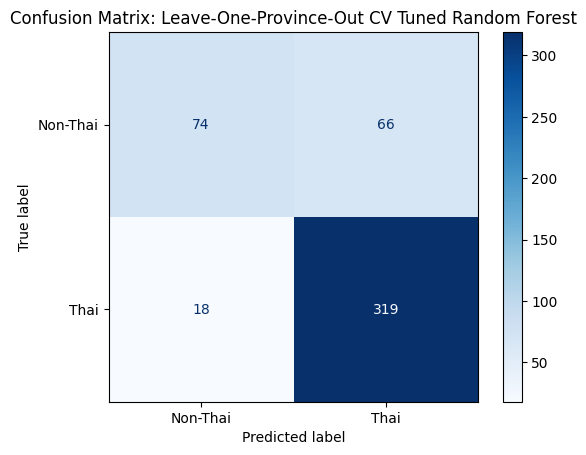

Class: Non-Thai
precision: 0.8043478260869565
recall: 0.5285714285714286
f1-score: 0.6379310344827587
support: 140.0

Class: Thai
precision: 0.8285714285714286
recall: 0.9465875370919882
f1-score: 0.8836565096952909
support: 337.0

accuracy: 0.8238993710691824

Class: macro avg
precision: 0.8164596273291926
recall: 0.7375794828317084
f1-score: 0.7607937720890248
support: 477.0

Class: weighted avg
precision: 0.8214617758506193
recall: 0.8238993710691824
f1-score: 0.8115358251465393
support: 477.0



In [65]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the best Random Forest model with the obtained parameters
best_rf = RandomForestClassifier(**grid_search_rf.best_params_, random_state=42)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# List of provinces to use as groups
prov_codes = ['SKM', 'PLG', 'JHR', 'SSX', 'PNA', 'KTX']

# Map 'prov_char' to integer labels
groups = df['prov_char']

# Filter out samples not in the selected provinces
X_filtered = X_rfe[groups != -1]
y_filtered = y[groups != -1]
groups_filtered = [g for g in groups if g != -1]

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X_filtered, y_filtered, groups_filtered):
    X_train, X_test = X_filtered[train_index], X_filtered[test_index]
    y_train, y_test = y_filtered[train_index], y_filtered[test_index]
    
    # Fit the model
    best_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_rf.predict(X_train)
    y_test_pred = best_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'Leave-One-Province-Out CV with Tuned Random Forest - Average Train Accuracy: {avg_train_accuracy}')
print(f'Leave-One-Province-Out CV with Tuned Random Forest - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_logo = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("Leave-One-Province-Out CV Tuned Random Forest Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if it's different
cm_logo_rf = confusion_matrix(y_true_all, y_pred_all)
disp_logo_rf = ConfusionMatrixDisplay(confusion_matrix=cm_logo_rf, display_labels=label_encoder.classes_)
disp_logo_rf.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Leave-One-Province-Out CV Tuned Random Forest')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


LOGOV with k-NN

Leave-One-Province-Out CV with Tuned k-NN - Average Train Accuracy: 1.0
Leave-One-Province-Out CV with Tuned k-NN - Average Test Accuracy: 0.7536709072616568
Leave-One-Province-Out CV Tuned k-NN Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.70      0.34      0.46       140
        Thai       0.77      0.94      0.85       337

    accuracy                           0.76       477
   macro avg       0.74      0.64      0.65       477
weighted avg       0.75      0.76      0.73       477



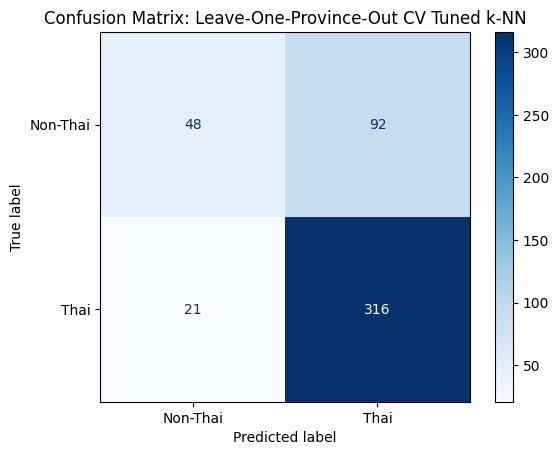

Class: Non-Thai
precision: 0.6956521739130435
recall: 0.34285714285714286
f1-score: 0.45933014354066987
support: 140.0

Class: Thai
precision: 0.7745098039215687
recall: 0.9376854599406528
f1-score: 0.8483221476510067
support: 337.0

accuracy: 0.7631027253668763

Class: macro avg
precision: 0.735080988917306
recall: 0.6402713013988979
f1-score: 0.6538261455958383
support: 477.0

Class: weighted avg
precision: 0.7513650068540769
recall: 0.7631027253668763
f1-score: 0.7341525866961908
support: 477.0



In [66]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the best k-NN model with the obtained parameters
best_knn = KNeighborsClassifier(**grid_search_knn.best_params_)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# List of provinces to use as groups
prov_codes = ['SKM', 'PLG', 'JHR', 'SSX', 'PNA', 'KTX']

# Map 'prov_char' to integer labels
groups = df['prov_char']

# Filter out samples not in the selected provinces
X_filtered = X_rfe[groups != -1]
y_filtered = y[groups != -1]
groups_filtered = [g for g in groups if g != -1]

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X_filtered, y_filtered, groups_filtered):
    X_train, X_test = X_filtered[train_index], X_filtered[test_index]
    y_train, y_test = y_filtered[train_index], y_filtered[test_index]
    
    # Fit the model
    best_knn.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_knn.predict(X_train)
    y_test_pred = best_knn.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'Leave-One-Province-Out CV with Tuned k-NN - Average Train Accuracy: {avg_train_accuracy}')
print(f'Leave-One-Province-Out CV with Tuned k-NN - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_knn_logo = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("Leave-One-Province-Out CV Tuned k-NN Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if it's different
cm_logo_knn = confusion_matrix(y_true_all, y_pred_all)
disp_logo_knn = ConfusionMatrixDisplay(confusion_matrix=cm_logo_knn, display_labels=label_encoder.classes_)
disp_logo_knn.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Leave-One-Province-Out CV Tuned k-NN')
plt.show()

# Display the detailed results
for class_name, metrics in report_knn_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


LOGOV with GBC

Leave-One-Province-Out CV with Tuned GBC - Average Train Accuracy: 1.0
Leave-One-Province-Out CV with Tuned GBC - Average Test Accuracy: 0.825847133988164
Leave-One-Province-Out CV Tuned GBC Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.83      0.51      0.63       140
        Thai       0.83      0.96      0.89       337

    accuracy                           0.83       477
   macro avg       0.83      0.73      0.76       477
weighted avg       0.83      0.83      0.81       477



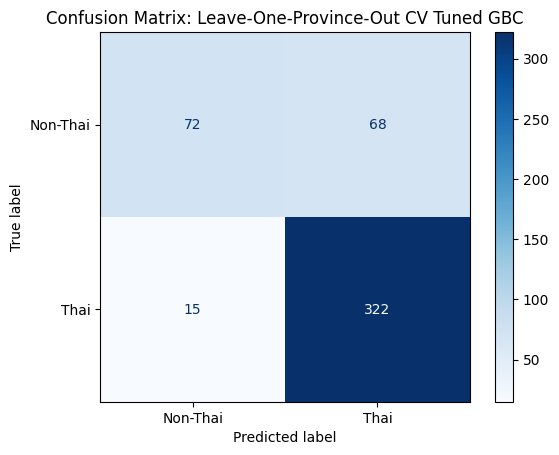

Class: Non-Thai
precision: 0.8275862068965517
recall: 0.5142857142857142
f1-score: 0.6343612334801763
support: 140.0

Class: Thai
precision: 0.8256410256410256
recall: 0.9554896142433235
f1-score: 0.8858321870701513
support: 337.0

accuracy: 0.8259958071278826

Class: macro avg
precision: 0.8266136162687887
recall: 0.7348876642645188
f1-score: 0.7600967102751638
support: 477.0

Class: weighted avg
precision: 0.8262119383784966
recall: 0.8259958071278826
f1-score: 0.8120251985951064
support: 477.0



In [67]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the best Gradient Boosting Classifier model with the obtained parameters
best_gbc = GradientBoostingClassifier(**grid_search_gbc.best_params_, random_state=42)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# List of provinces to use as groups
prov_codes = ['SKM', 'PLG', 'JHR', 'SSX', 'PNA', 'KTX']

# Map 'prov_char' to integer labels
groups = df['prov_char']

# Filter out samples not in the selected provinces
X_filtered = X_rfe[groups != -1]
y_filtered = y[groups != -1]
groups_filtered = [g for g in groups if g != -1]

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X_filtered, y_filtered, groups_filtered):
    X_train, X_test = X_filtered[train_index], X_filtered[test_index]
    y_train, y_test = y_filtered[train_index], y_filtered[test_index]
    
    # Fit the model
    best_gbc.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_gbc.predict(X_train)
    y_test_pred = best_gbc.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'Leave-One-Province-Out CV with Tuned GBC - Average Train Accuracy: {avg_train_accuracy}')
print(f'Leave-One-Province-Out CV with Tuned GBC - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_gbc_logo = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("Leave-One-Province-Out CV Tuned GBC Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if it's different
cm_logo_gbc = confusion_matrix(y_true_all, y_pred_all)
disp_logo_gbc = ConfusionMatrixDisplay(confusion_matrix=cm_logo_gbc, display_labels=label_encoder.classes_)
disp_logo_gbc.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Leave-One-Province-Out CV Tuned GBC')
plt.show()

# Display the detailed results
for class_name, metrics in report_gbc_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


LOGOV with LDA

Leave-One-Province-Out CV with Tuned LDA - Average Train Accuracy: 0.8990847065865207
Leave-One-Province-Out CV with Tuned LDA - Average Test Accuracy: 0.6575881107875403
Leave-One-Province-Out CV Tuned LDA Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.48      0.37      0.42       140
        Thai       0.76      0.83      0.79       337

    accuracy                           0.70       477
   macro avg       0.62      0.60      0.61       477
weighted avg       0.68      0.70      0.68       477



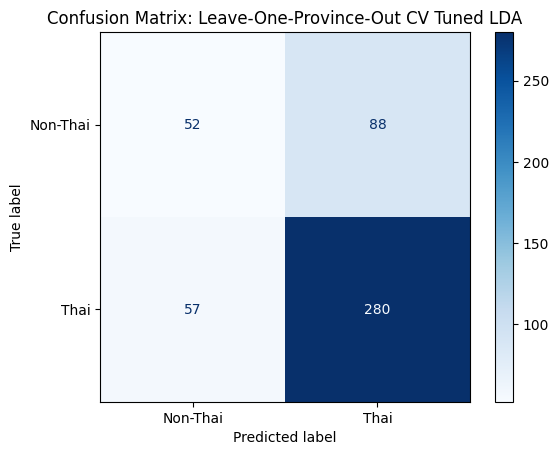

Class: Non-Thai
precision: 0.47706422018348627
recall: 0.37142857142857144
f1-score: 0.41767068273092367
support: 140.0

Class: Thai
precision: 0.7608695652173914
recall: 0.8308605341246291
f1-score: 0.7943262411347518
support: 337.0

accuracy: 0.6960167714884696

Class: macro avg
precision: 0.6189668927004388
recall: 0.6011445527766003
f1-score: 0.6059984619328378
support: 477.0

Class: weighted avg
precision: 0.6775723989600607
recall: 0.6960167714884696
f1-score: 0.6837774399260811
support: 477.0



In [68]:
# Define the best LDA model with the obtained parameters
best_lda = LinearDiscriminantAnalysis(**grid_search_lda.best_params_)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# List of provinces to use as groups
prov_codes = ['SKM', 'PLG', 'JHR', 'SSX', 'PNA', 'KTX']

# Map 'prov_char' to integer labels
groups = df['prov_char']

# Filter out samples not in the selected provinces
X_filtered = X_rfe[groups != -1]
y_filtered = y[groups != -1]
groups_filtered = [g for g in groups if g != -1]

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X_filtered, y_filtered, groups_filtered):
    X_train, X_test = X_filtered[train_index], X_filtered[test_index]
    y_train, y_test = y_filtered[train_index], y_filtered[test_index]
    
    # Fit the model
    best_lda.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_lda.predict(X_train)
    y_test_pred = best_lda.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'Leave-One-Province-Out CV with Tuned LDA - Average Train Accuracy: {avg_train_accuracy}')
print(f'Leave-One-Province-Out CV with Tuned LDA - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_lda_logo = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("Leave-One-Province-Out CV Tuned LDA Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if it's different
cm_logo_lda = confusion_matrix(y_true_all, y_pred_all)
disp_logo_lda = ConfusionMatrixDisplay(confusion_matrix=cm_logo_lda, display_labels=label_encoder.classes_)
disp_logo_lda.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Leave-One-Province-Out CV Tuned LDA')
plt.show()

# Display the detailed results
for class_name, metrics in report_lda_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


LOGOV with Logistic Regression

Leave-One-Province-Out CV with Tuned Logistic Regression - Average Train Accuracy: 0.8866164526256999
Leave-One-Province-Out CV with Tuned Logistic Regression - Average Test Accuracy: 0.6766144018428587
Leave-One-Province-Out CV Tuned Logistic Regression Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.53      0.40      0.46       140
        Thai       0.77      0.85      0.81       337

    accuracy                           0.72       477
   macro avg       0.65      0.63      0.63       477
weighted avg       0.70      0.72      0.71       477



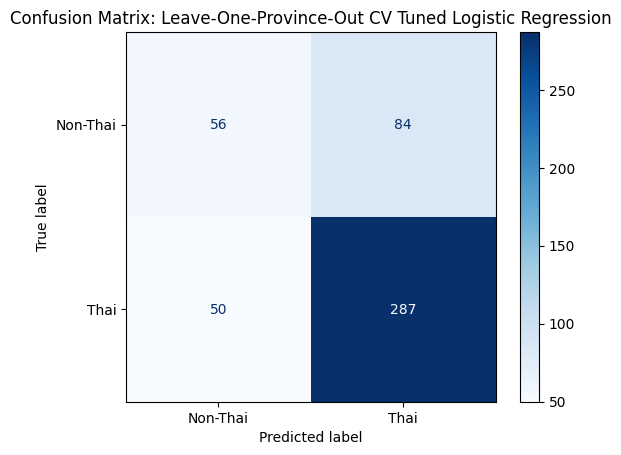

Class: Non-Thai
precision: 0.5283018867924528
recall: 0.4
f1-score: 0.45528455284552843
support: 140.0

Class: Thai
precision: 0.7735849056603774
recall: 0.8516320474777448
f1-score: 0.8107344632768362
support: 337.0

accuracy: 0.7190775681341719

Class: macro avg
precision: 0.6509433962264151
recall: 0.6258160237388724
f1-score: 0.6330095080611823
support: 477.0

Class: weighted avg
precision: 0.7015940825125588
recall: 0.7190775681341719
f1-score: 0.7064095419762427
support: 477.0



In [69]:
# Define the best Logistic Regression model with the obtained parameters
best_logreg = LogisticRegression(**grid_search_logreg.best_params_, random_state=42)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# List of provinces to use as groups
prov_codes = ['SKM', 'PLG', 'JHR', 'SSX', 'PNA', 'KTX']

# Map 'prov_char' to integer labels
groups = df['prov_char']

# Filter out samples not in the selected provinces
X_filtered = X_rfe[groups != -1]
y_filtered = y[groups != -1]
groups_filtered = [g for g in groups if g != -1]

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X_filtered, y_filtered, groups_filtered):
    X_train, X_test = X_filtered[train_index], X_filtered[test_index]
    y_train, y_test = y_filtered[train_index], y_filtered[test_index]
    
    # Fit the model
    best_logreg.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_logreg.predict(X_train)
    y_test_pred = best_logreg.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'Leave-One-Province-Out CV with Tuned Logistic Regression - Average Train Accuracy: {avg_train_accuracy}')
print(f'Leave-One-Province-Out CV with Tuned Logistic Regression - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_logreg_logo = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("Leave-One-Province-Out CV Tuned Logistic Regression Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if it's different
cm_logo_logreg = confusion_matrix(y_true_all, y_pred_all)
disp_logo_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logo_logreg, display_labels=label_encoder.classes_)
disp_logo_logreg.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Leave-One-Province-Out CV Tuned Logistic Regression')
plt.show()

# Display the detailed results
for class_name, metrics in report_logreg_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()
